# Modelos: Comparativas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH      = '..'
LIB_PATH       = f'{BASE_PATH}/lib'
DATASETS_PATH  = f'{BASE_PATH}/datasets'
METRICS_PATH   = f'{BASE_PATH}/metrics'

In [3]:
import sys
sys.path.append(LIB_PATH)

import numpy as np
import pandas as pd

import model as ml
import data.plot as pl

2023-11-07 22:23:15.728251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 22:23:16.127551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-07 22:23:16.534115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-07 22:23:16.544691: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

<Figure size 640x480 with 0 Axes>

## Comparativa

In [4]:
summary = ml.ValidatorSummary.load_and_join([
    f'{METRICS_PATH}/knn', 
    f'{METRICS_PATH}/gmf', 
    f'{METRICS_PATH}/biased_gmf', 
    f'{METRICS_PATH}/nnmf', 
    f'{METRICS_PATH}/deep_fm',
    f'{METRICS_PATH}/stacking',
    f'{METRICS_PATH}/cb_user_profile'
])

In [5]:
summary.show()

Ordered by mAP@5(4,5):


sample      RMSE  \
predictor                                                              
Stacking                                             249.5  1.531380   
BiasedGMF                                            249.5  0.994005   
DeepFM                                               249.5  0.920512   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...    99.5  1.385809   
KNNItemBasedPredictor                                 99.5  1.594138   
NNMF                                                 249.5  0.921573   
KNNUserBasedPredictor                                 99.5  1.601644   
GMF                                                  249.5  2.200546   
UserProfileRecommender(genres, adults, year)          49.5  1.032838   

                                                     mNDCG@5  mAP@5(4,5)  \
predictor                                                                  
Stacking                                            0.965332    0.434418   
BiasedGMF                                           0.961383    0.433127   
DeepFM                                              0.958641    0.432331   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.956877    0.430173   
KNNItemBasedPredictor                               0.953267    0.428817   
NNMF                                                0.958034    0.425299   
KNNUserBasedPredictor                               0.957770    0.415362   
GMF                                                 0.954143    0.396944   
UserProfileRecommender(genres, adults, year)        0.957981    0.366472   

                                                    MeanUserF1.0Score@5(4,5)  \
predictor                                                                      
Stacking                                                            0.672879   
BiasedGMF                                                           0.663120   
DeepFM                                                              0.663434   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.644610   
KNNItemBasedPredictor                                               0.642452   
NNMF                                                                0.644337   
KNNUserBasedPredictor                                               0.595985   
GMF                                                                 0.511775   
UserProfileRecommender(genres, adults, year)                        0.614142   

                                                    Precision@5(4,5)  \
predictor                                                              
Stacking                                                    0.672813   
BiasedGMF                                                   0.662751   
DeepFM                                                      0.661825   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...          0.646796   
KNNItemBasedPredictor                                       0.641930   
NNMF                                                        0.644576   
KNNUserBasedPredictor                                       0.596644   
GMF                                                         0.512254   
UserProfileRecommender(genres, adults, year)                0.617618   

                                                    Recall@5(4,5)  
predictor                                                          
Stacking                                                 0.672680  
BiasedGMF                                                0.662871  
DeepFM                                                   0.662038  
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...       0.645394  
KNNItemBasedPredictor                                    0.643143  
NNMF                                                     0.644272  
KNNUserBasedPredictor                                    0.598339  
GMF                                                      0.512324  
UserProfileRecommender(genres, adults, year)             0.612763

In [6]:
summary.show(['mAP@5(4,5)'], ['mAP@5(4,5)'])

Ordered by mAP@5(4,5):


mAP@5(4,5)
predictor                                                     
Stacking                                              0.434418
BiasedGMF                                             0.433127
DeepFM                                                0.432331
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...    0.430173
KNNItemBasedPredictor                                 0.428817
NNMF                                                  0.425299
KNNUserBasedPredictor                                 0.415362
GMF                                                   0.396944
UserProfileRecommender(genres, adults, year)          0.366472

In [7]:
summary.show(['mNDCG@5'], ['mNDCG@5'])

Ordered by mNDCG@5:


mNDCG@5
predictor                                                   
Stacking                                            0.965332
BiasedGMF                                           0.961383
DeepFM                                              0.958641
NNMF                                                0.958034
UserProfileRecommender(genres, adults, year)        0.957981
KNNUserBasedPredictor                               0.957770
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.956877
GMF                                                 0.954143
KNNItemBasedPredictor                               0.953267

In [8]:
summary.show(['RMSE'], ['RMSE'], ascending=True)

Ordered by RMSE:


RMSE
predictor                                                   
DeepFM                                              0.920512
NNMF                                                0.921573
BiasedGMF                                           0.994005
UserProfileRecommender(genres, adults, year)        1.032838
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  1.385809
Stacking                                            1.531380
KNNItemBasedPredictor                               1.594138
KNNUserBasedPredictor                               1.601644
GMF                                                 2.200546

In [9]:
summary.show(['MeanUserF1.0Score@5(4,5)'], ['MeanUserF1.0Score@5(4,5)'])

Ordered by MeanUserF1.0Score@5(4,5):


MeanUserF1.0Score@5(4,5)
predictor                                                                   
Stacking                                                            0.672879
DeepFM                                                              0.663434
BiasedGMF                                                           0.663120
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.644610
NNMF                                                                0.644337
KNNItemBasedPredictor                                               0.642452
UserProfileRecommender(genres, adults, year)                        0.614142
KNNUserBasedPredictor                                               0.595985
GMF                                                                 0.511775

In [10]:
from IPython.display import Latex
Latex(summary.to_latex())

Ordered by mAP@5(4,5):


<IPython.core.display.Latex object>

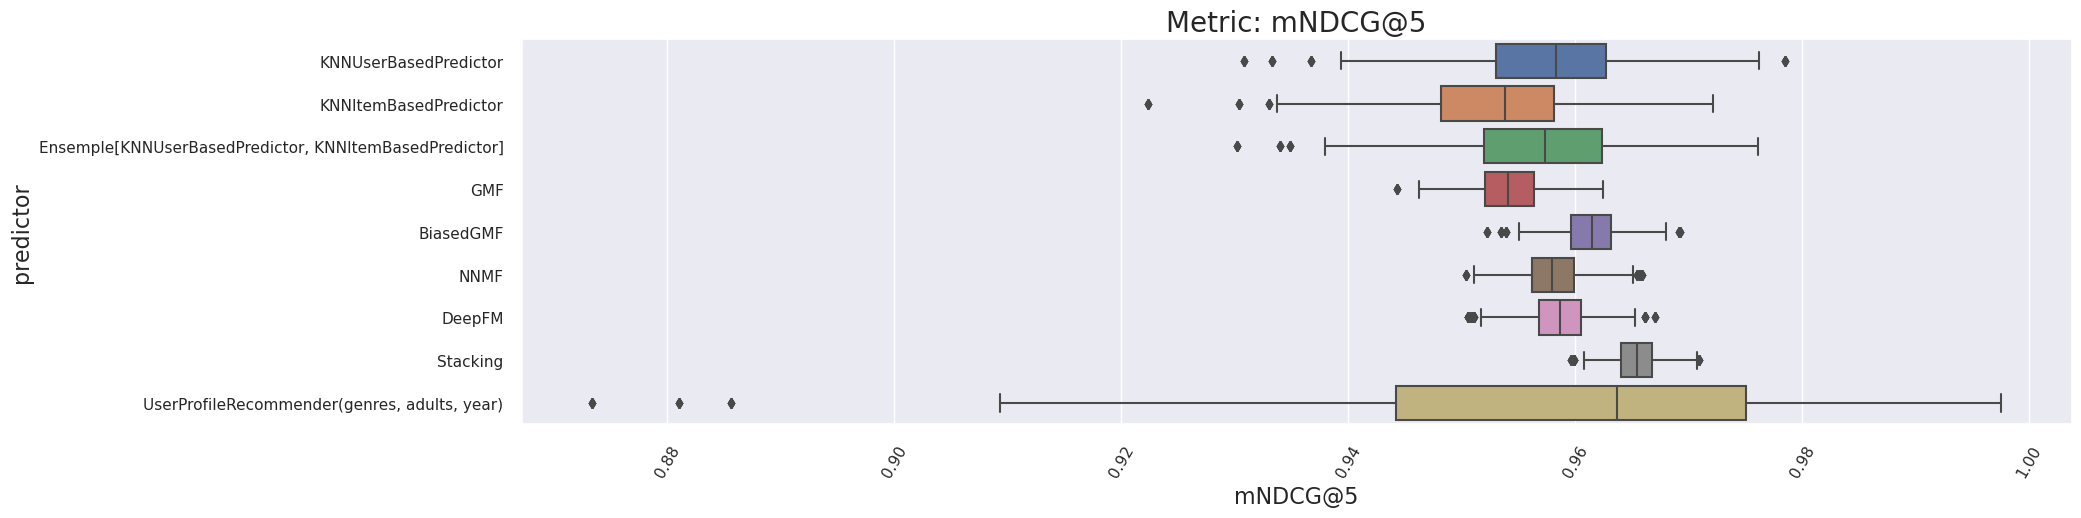

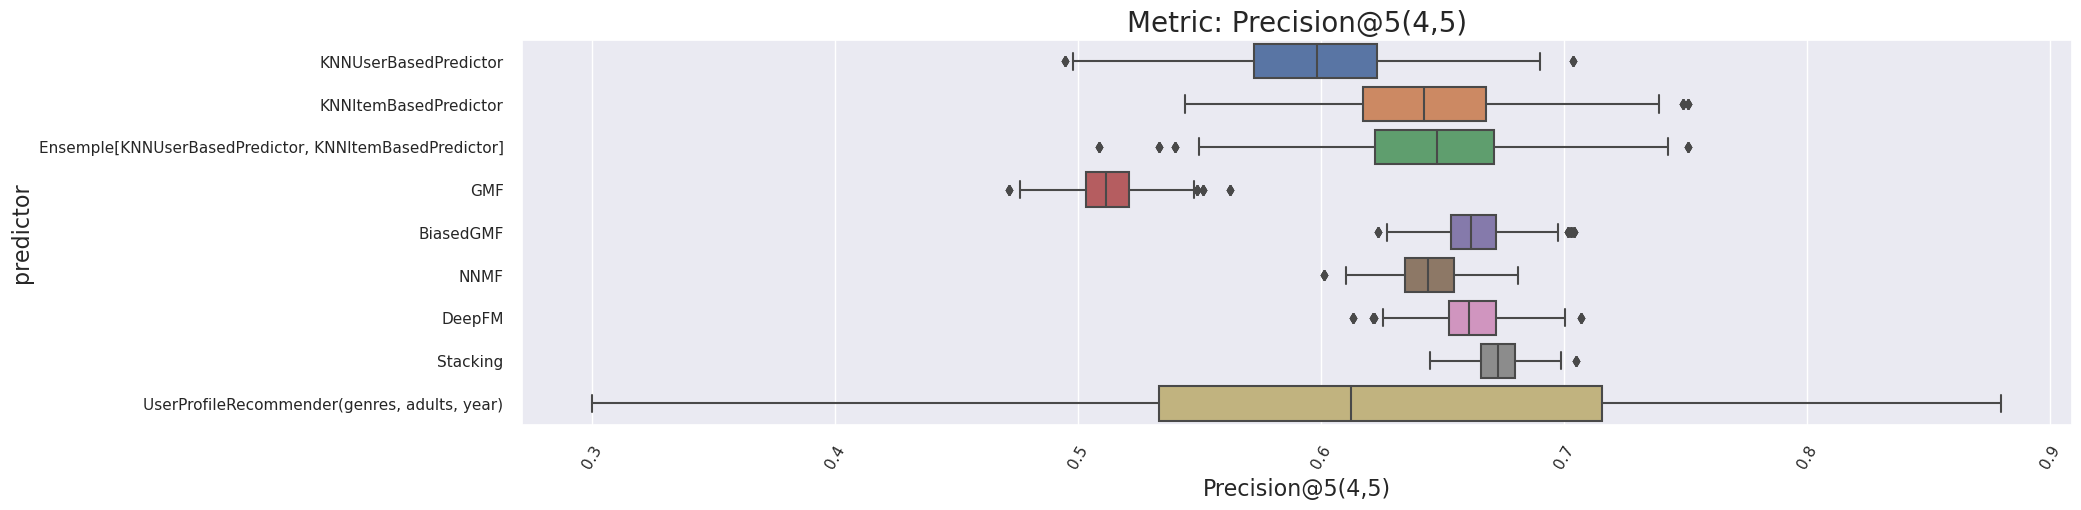

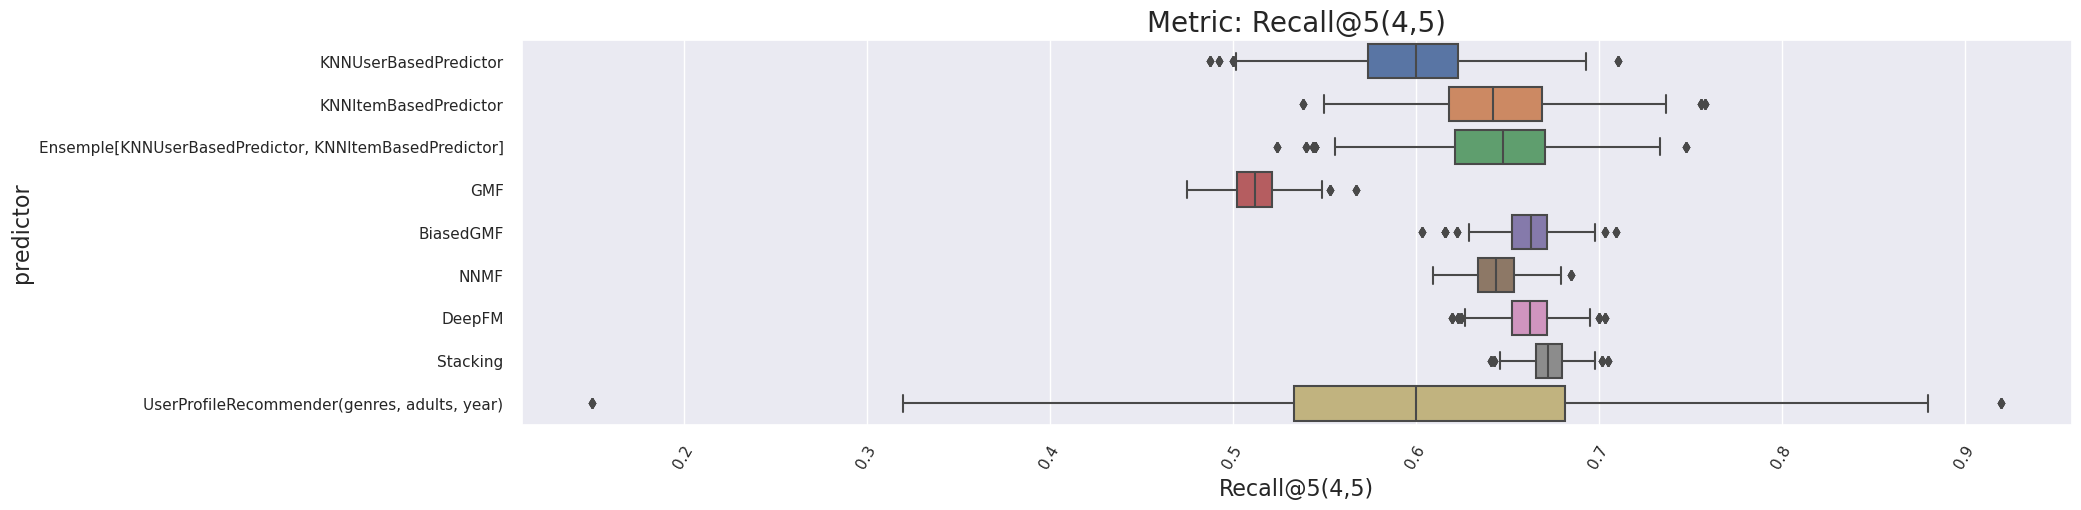

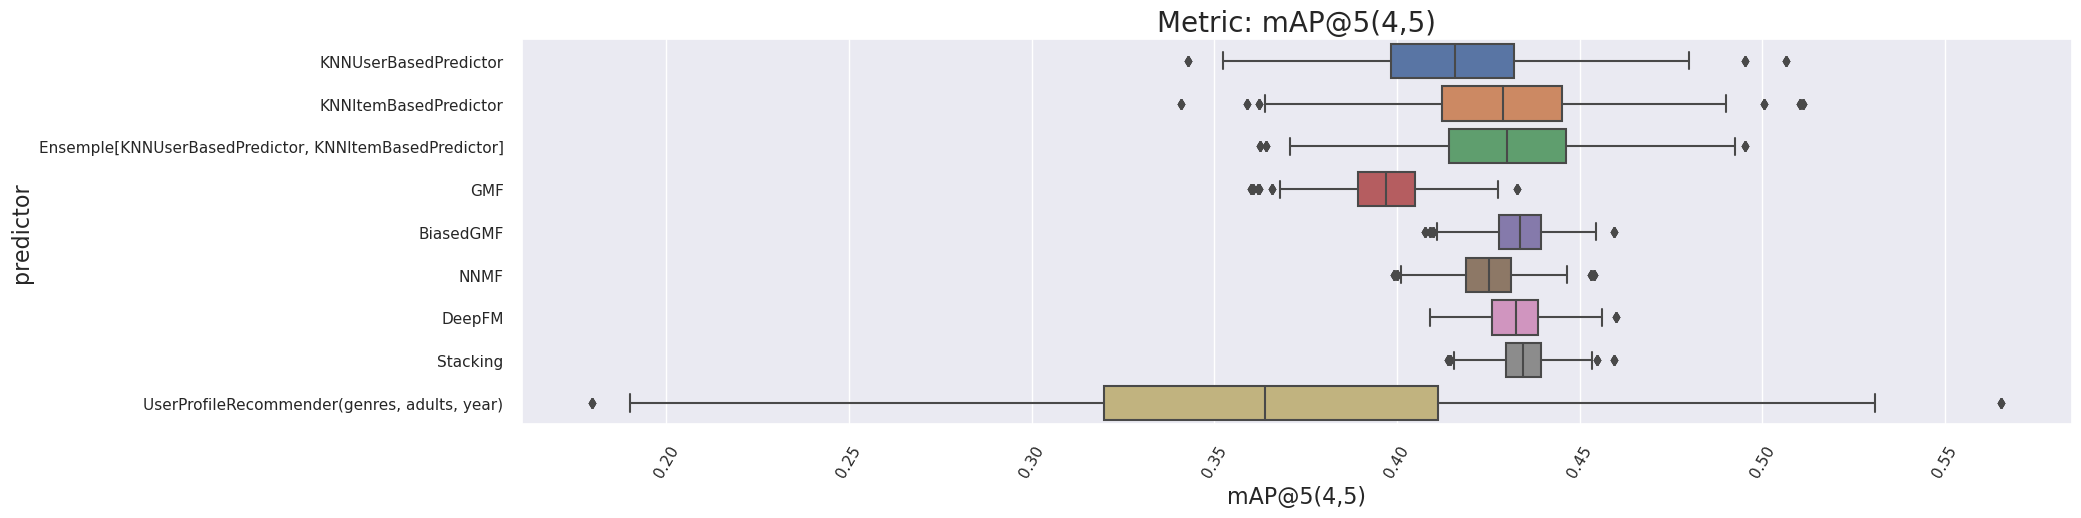

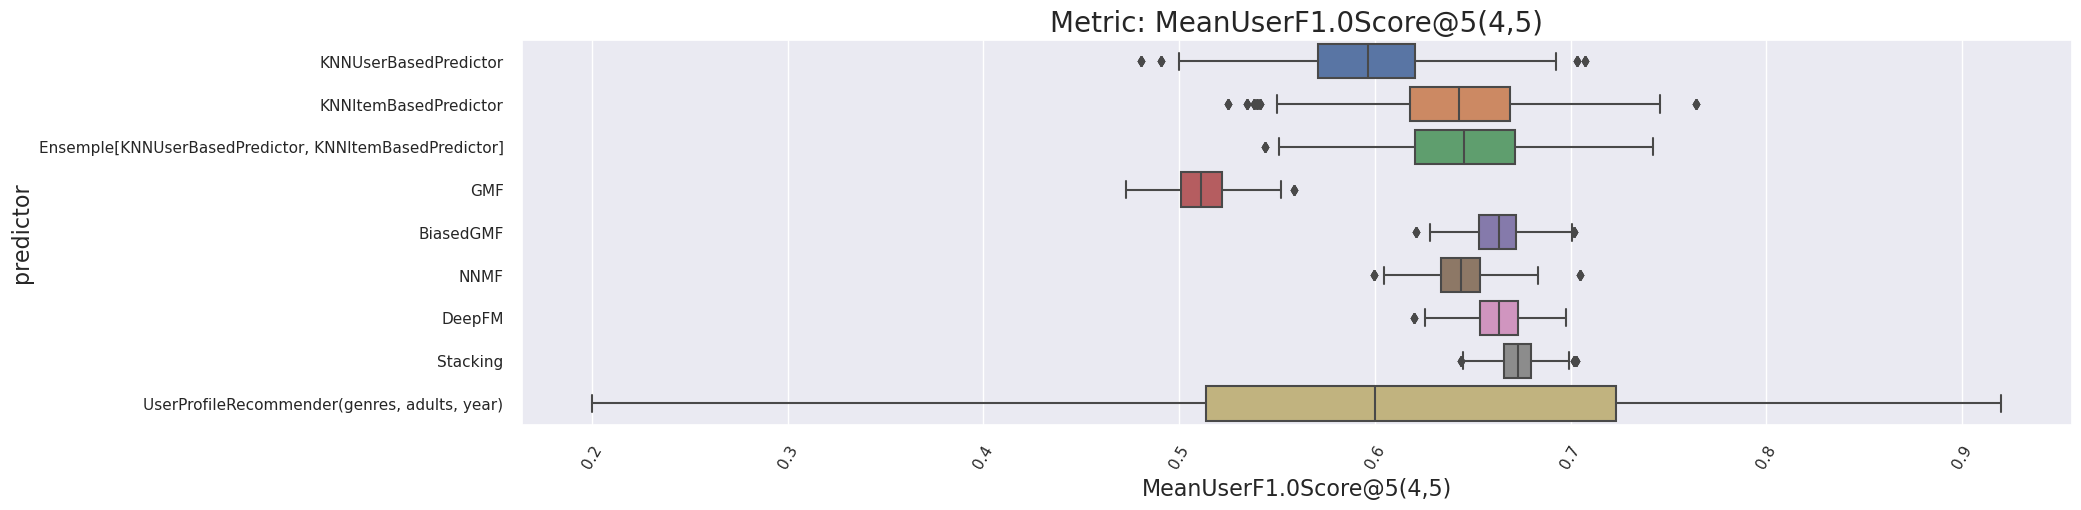

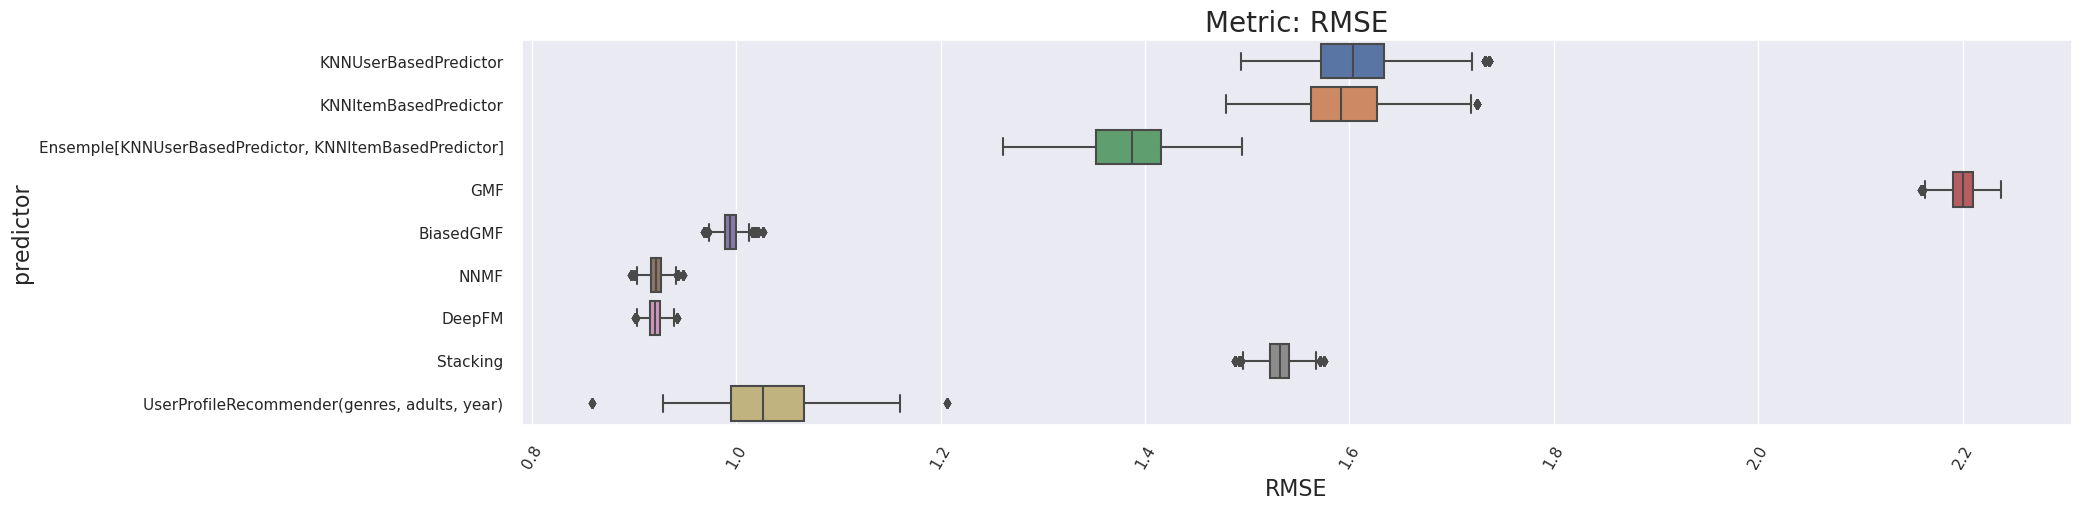

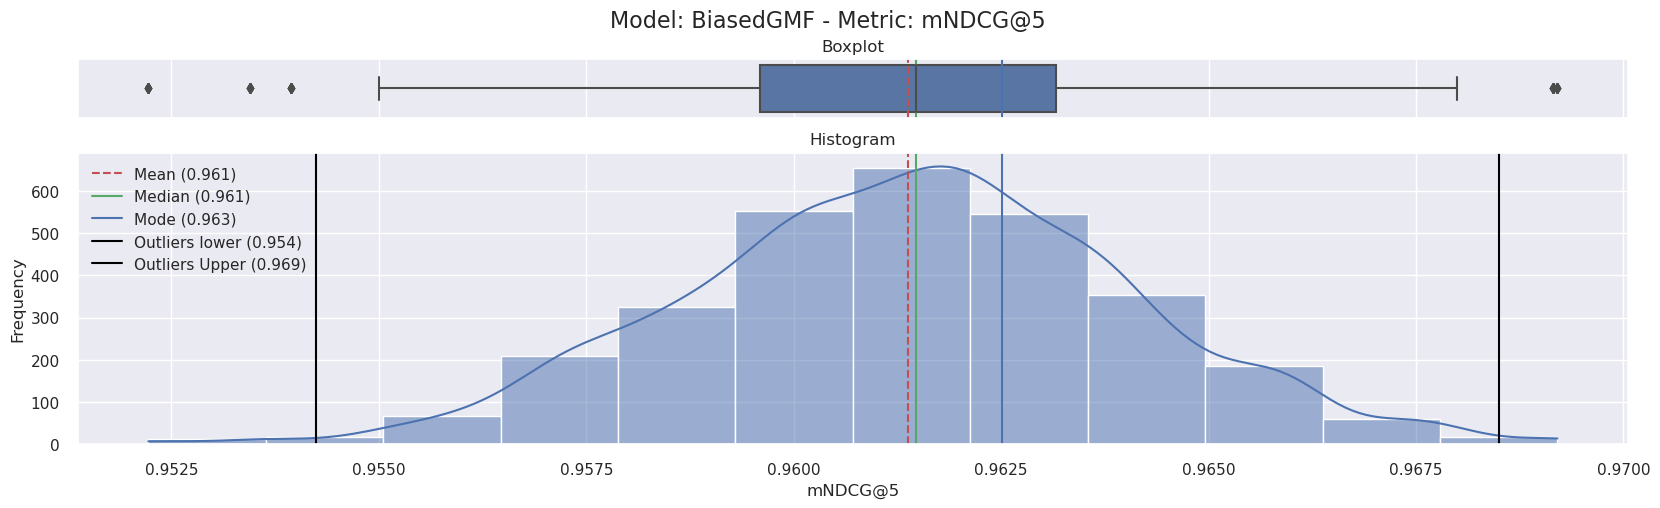

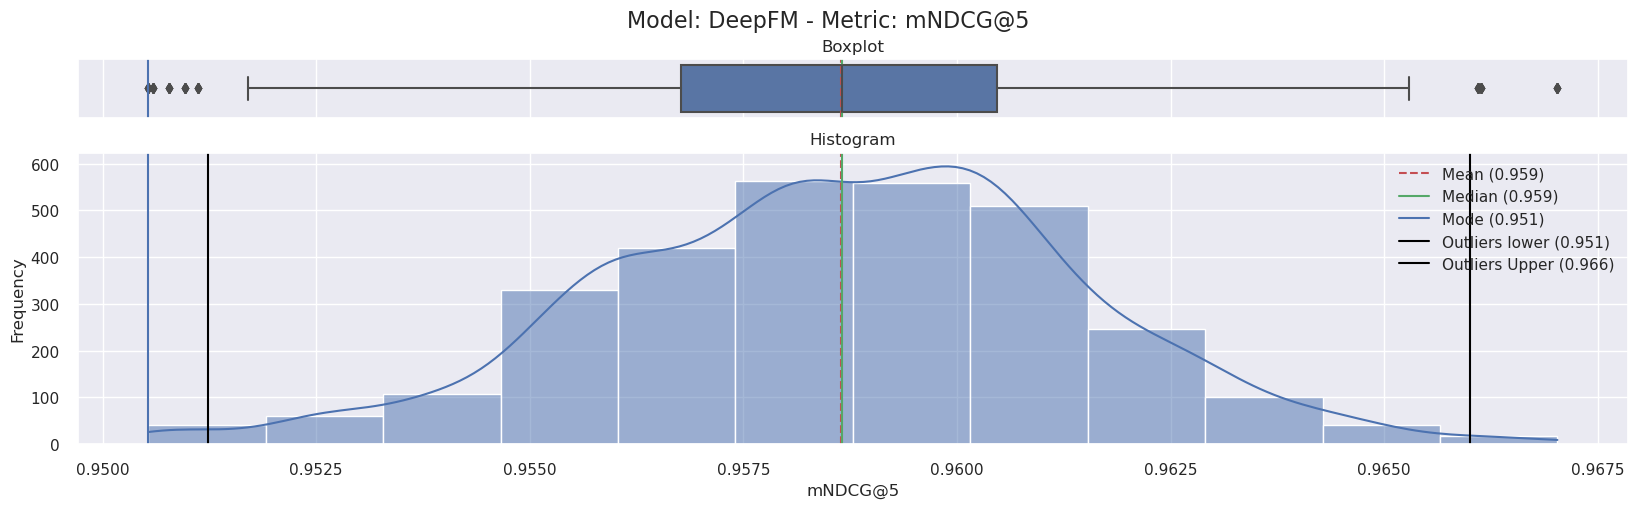

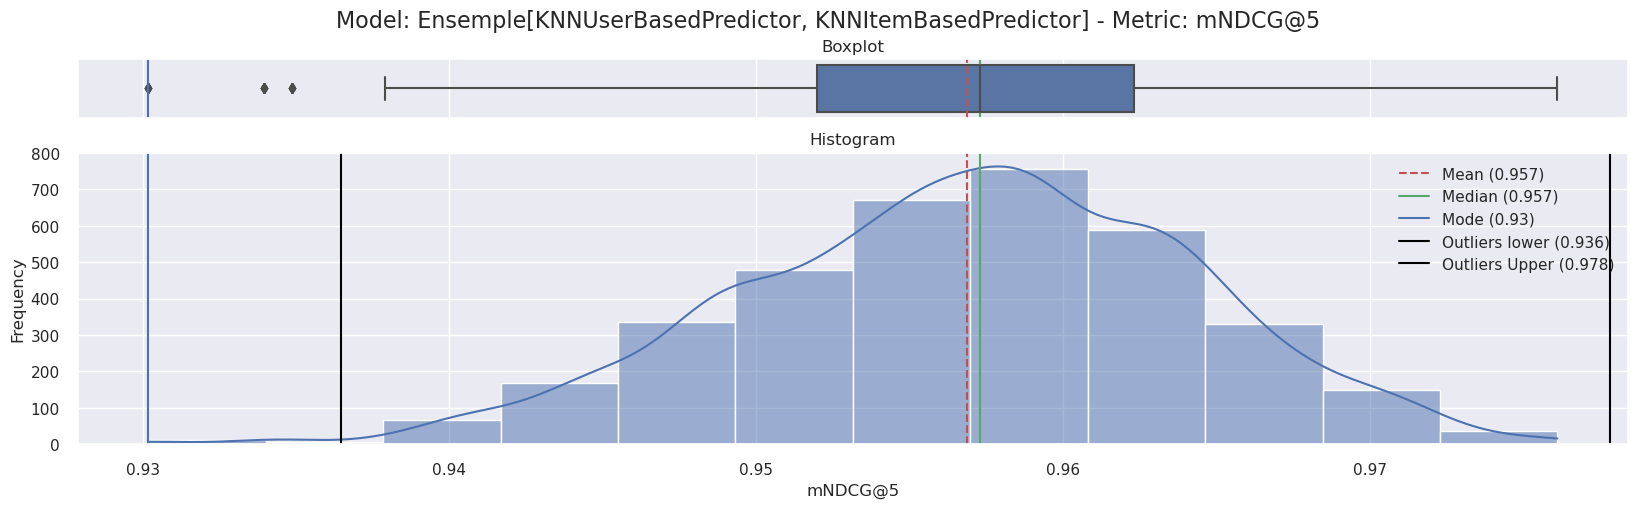

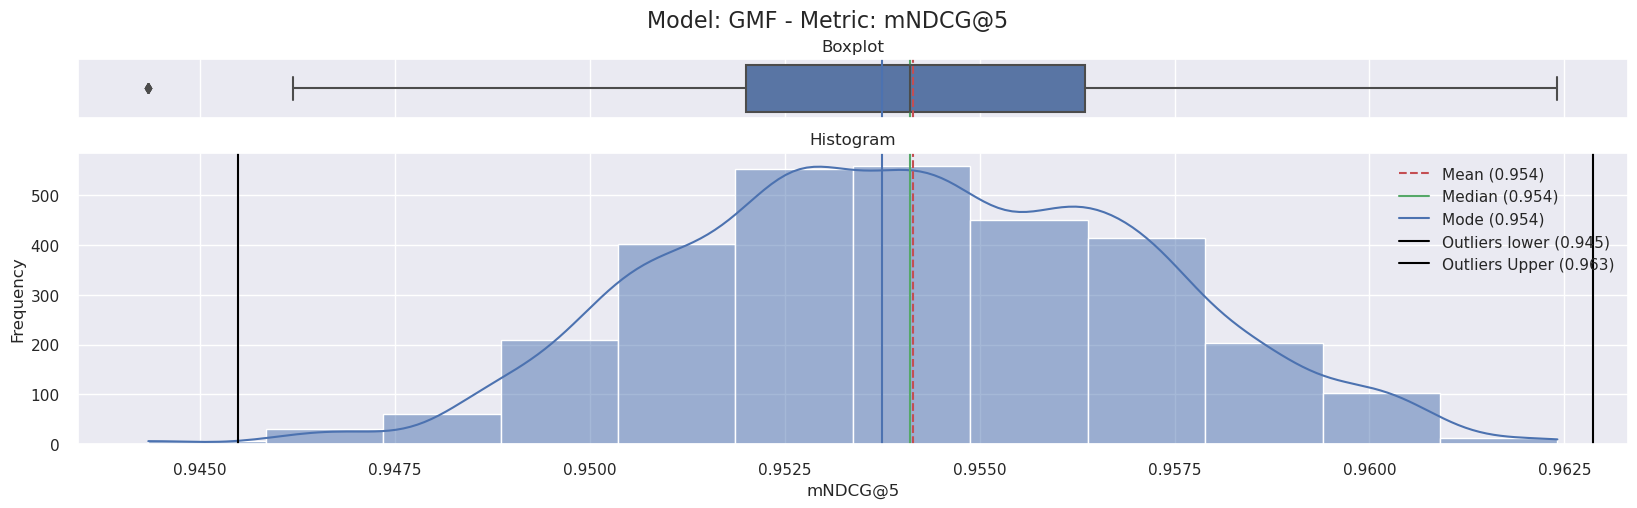

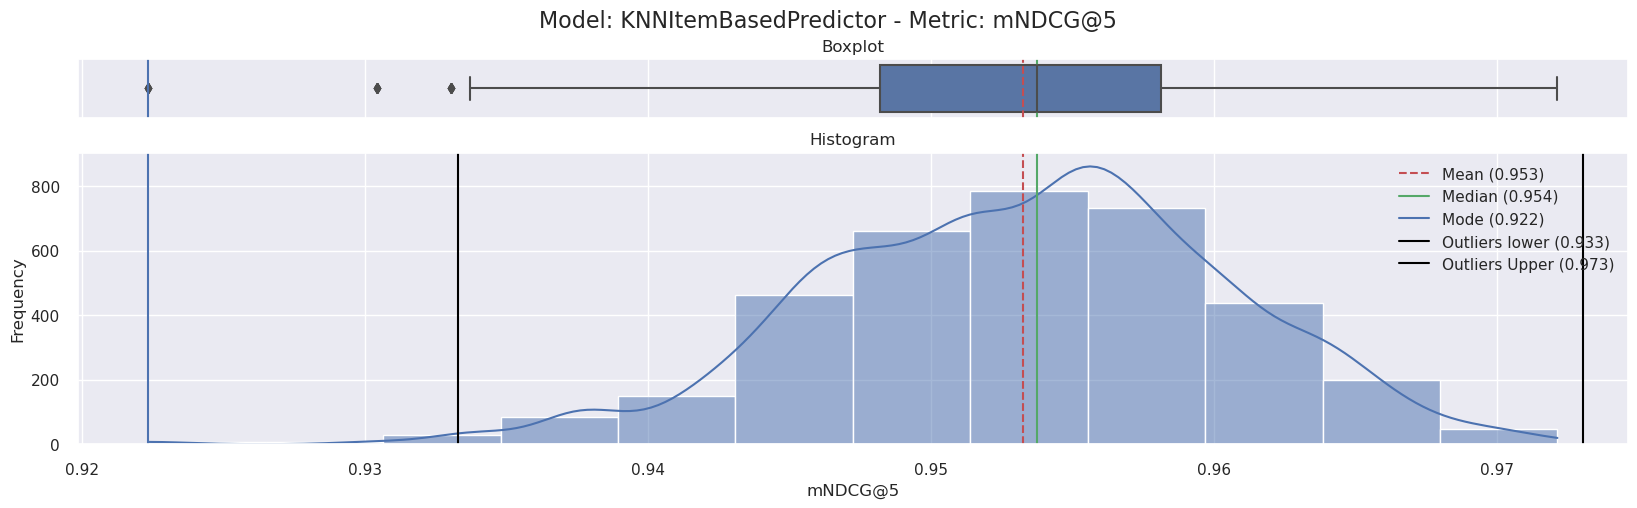

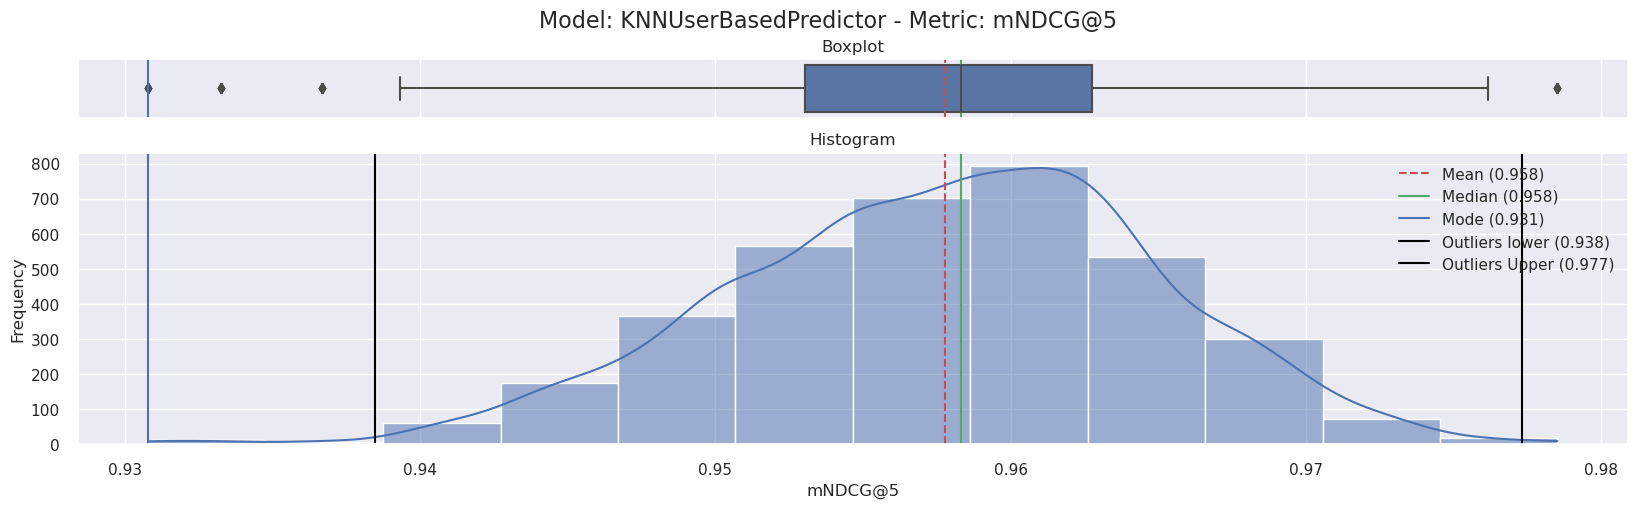

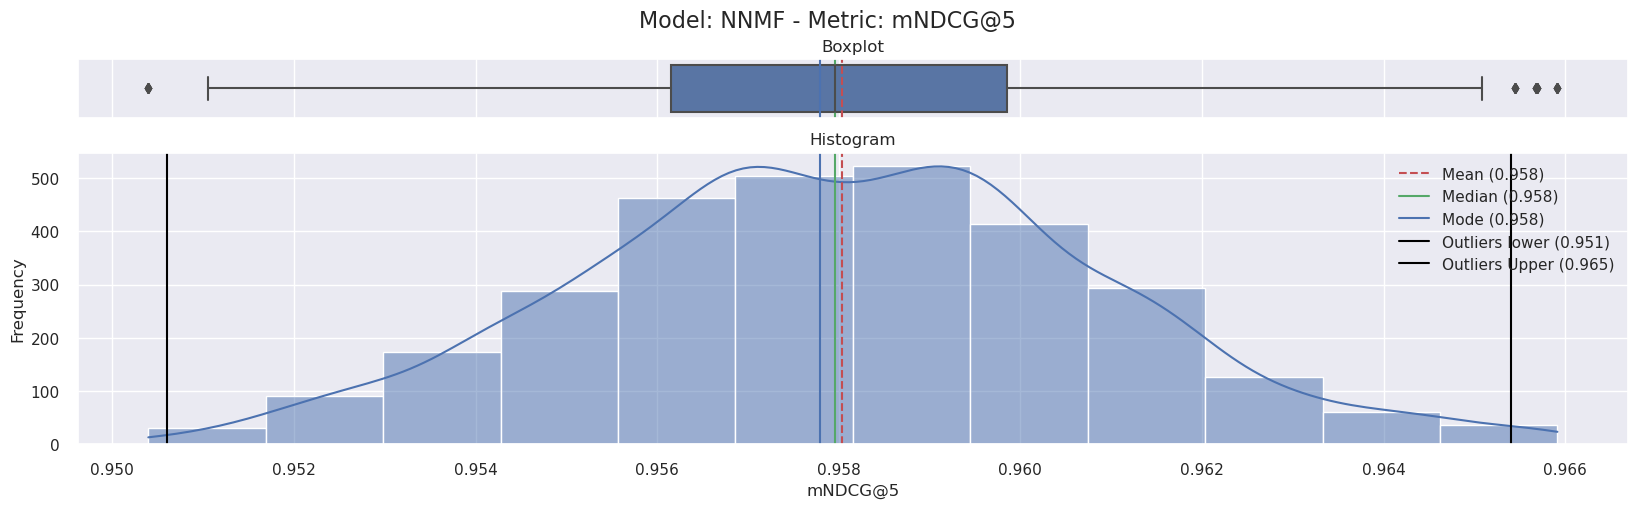

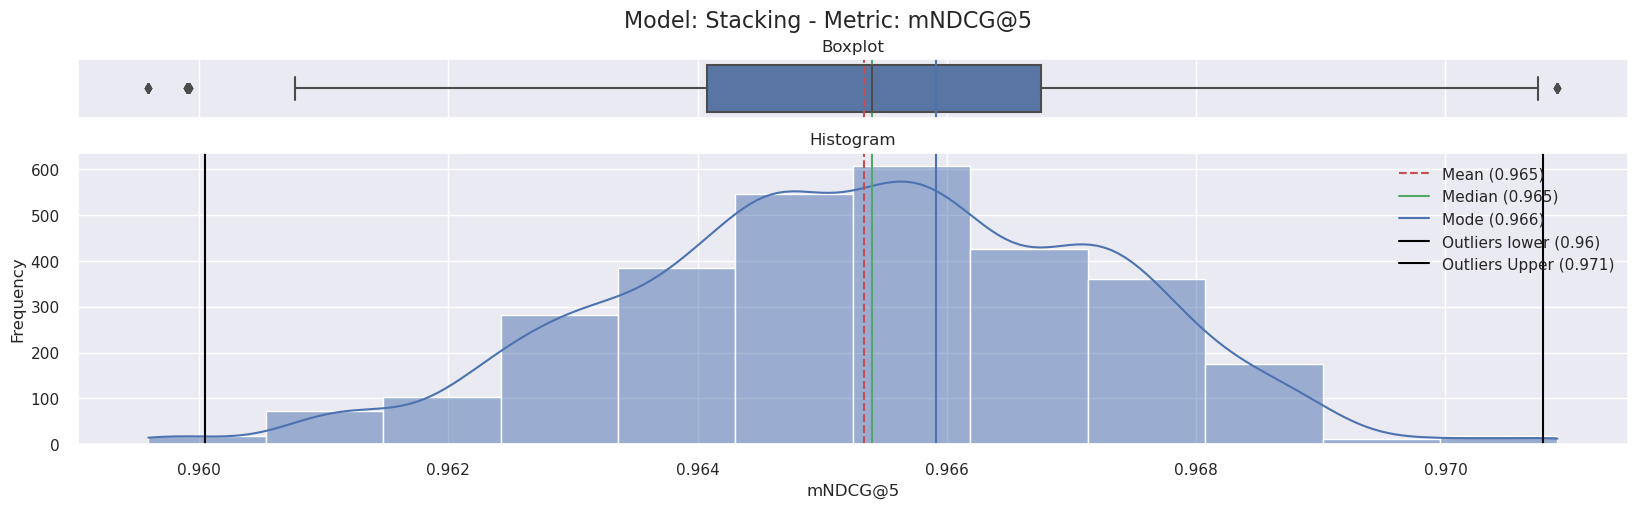

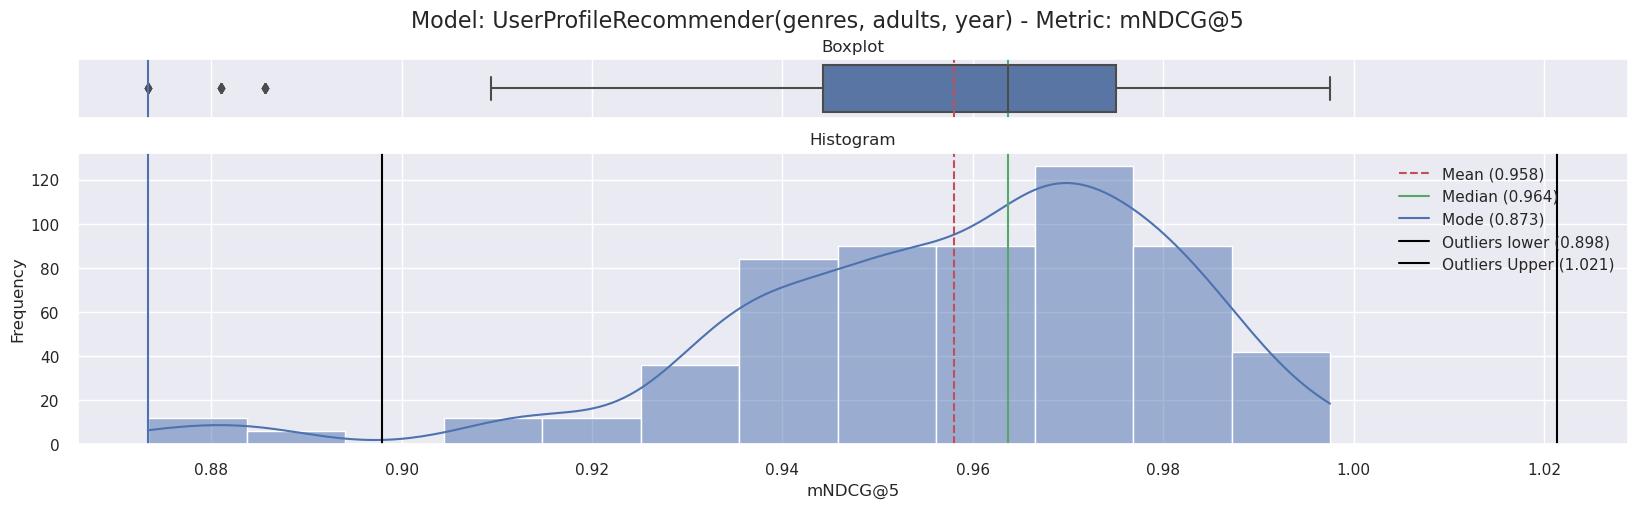

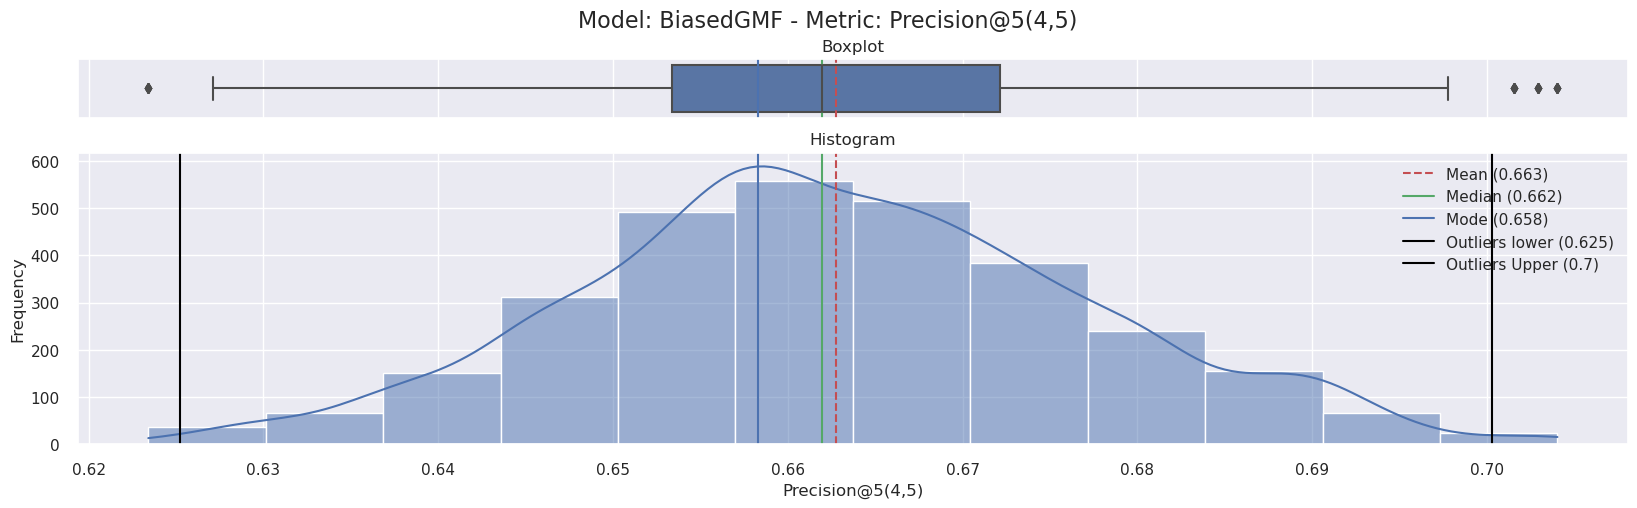

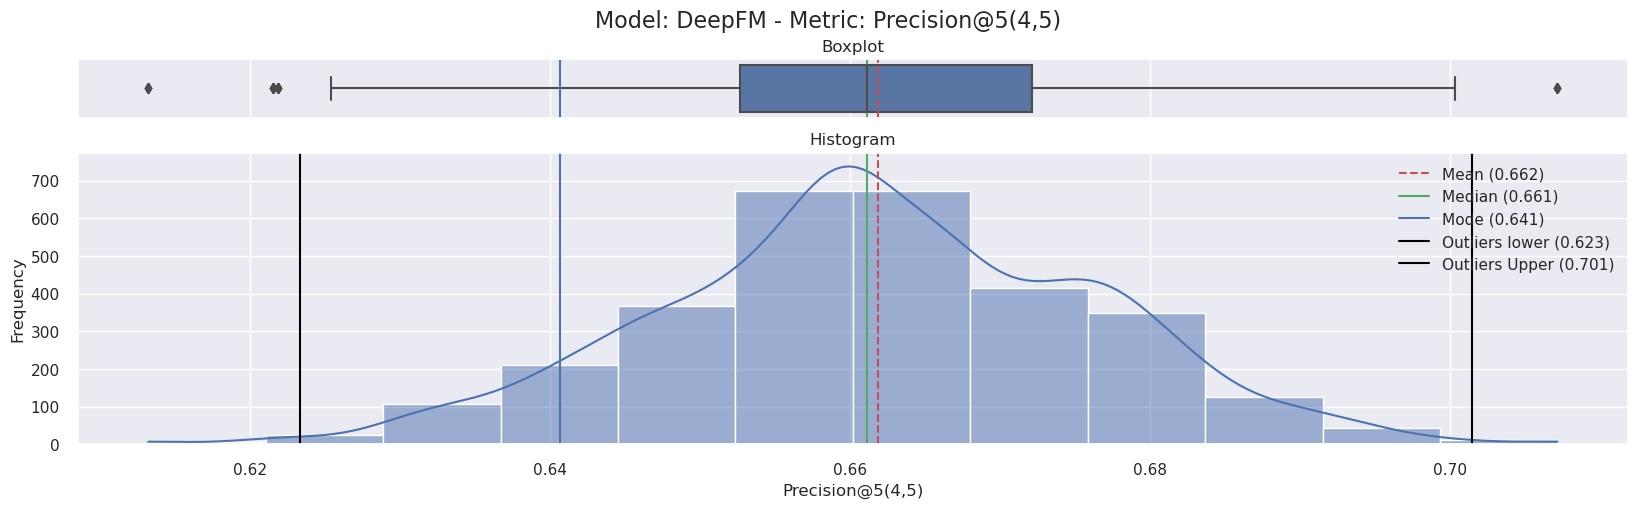

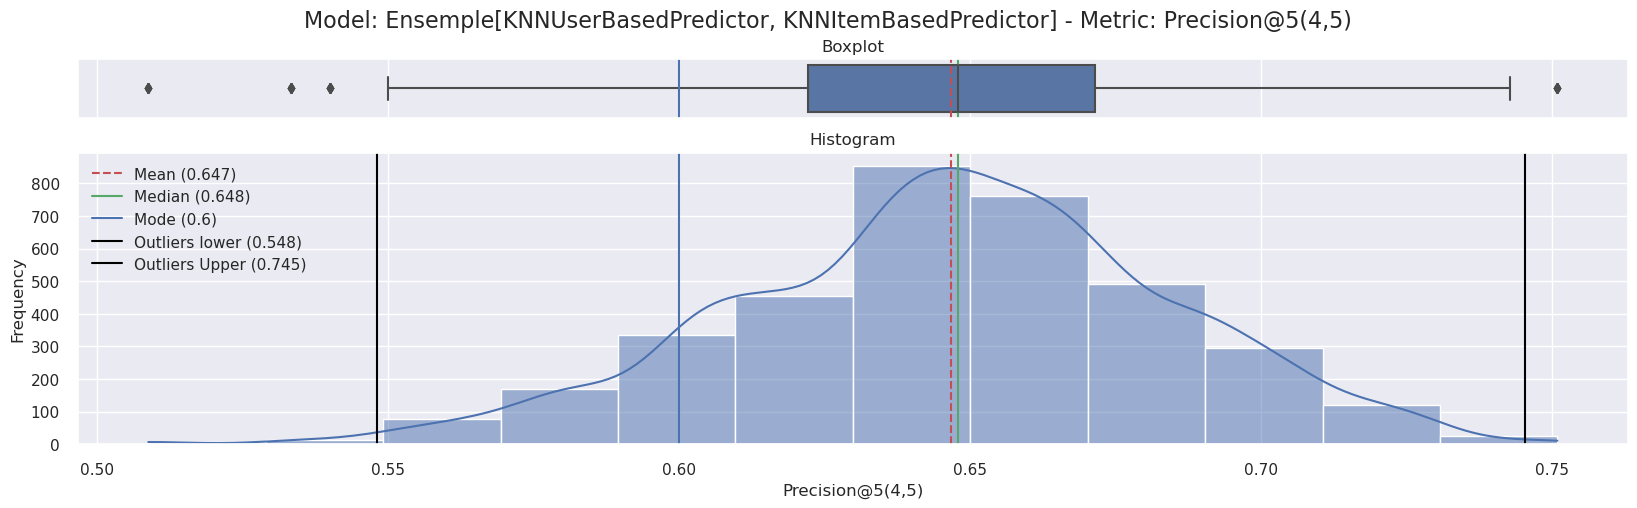

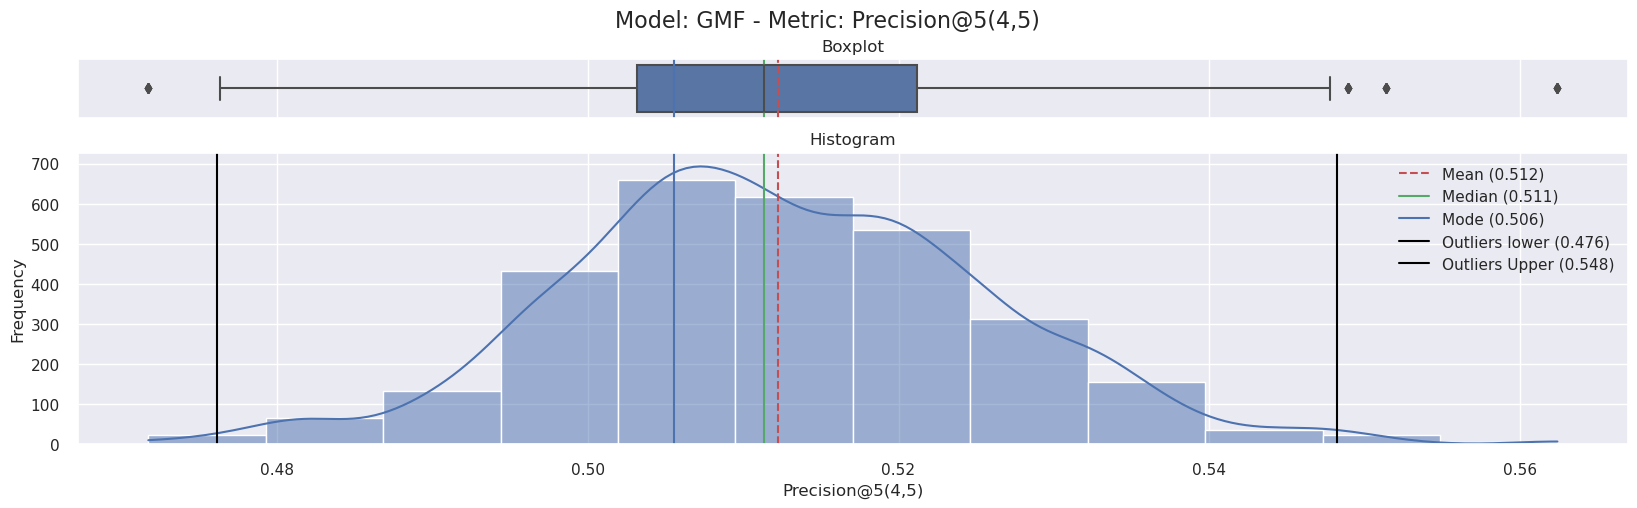

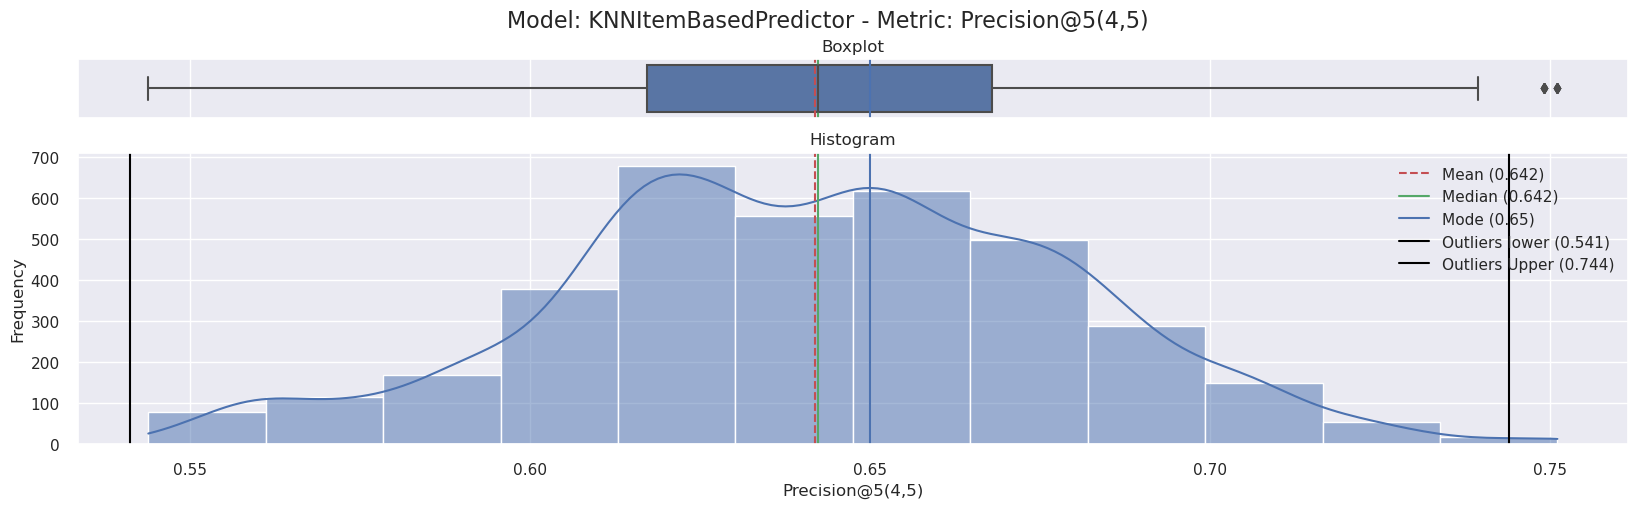

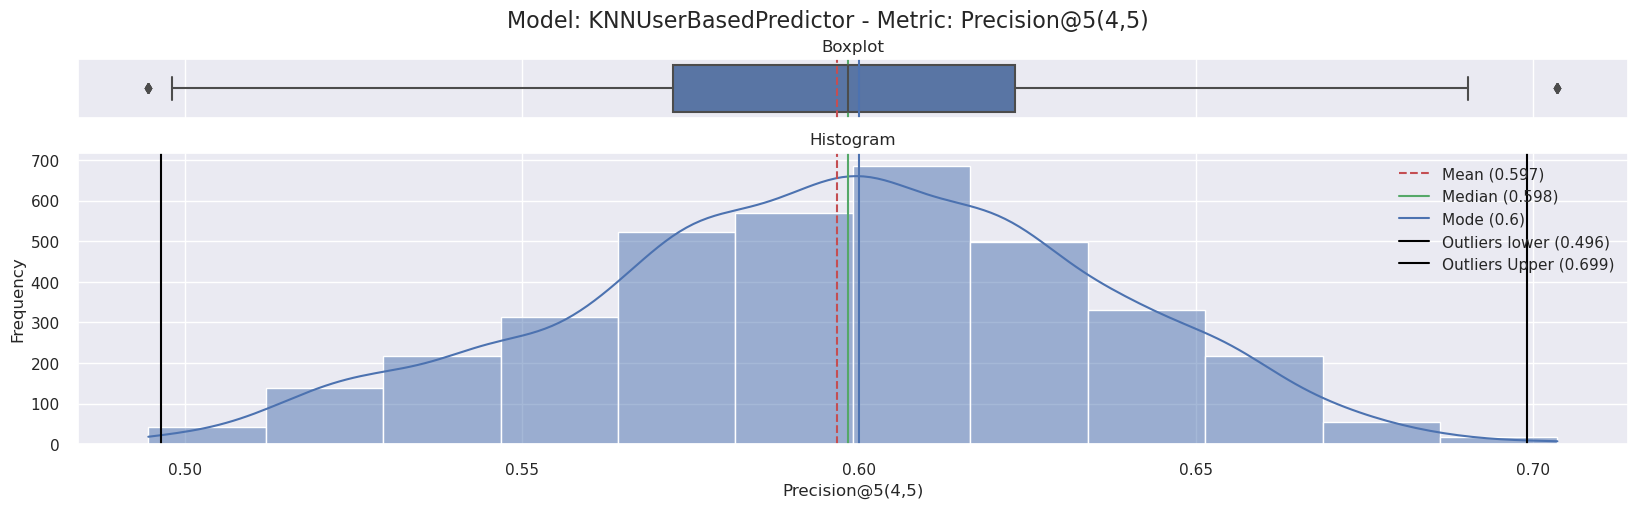

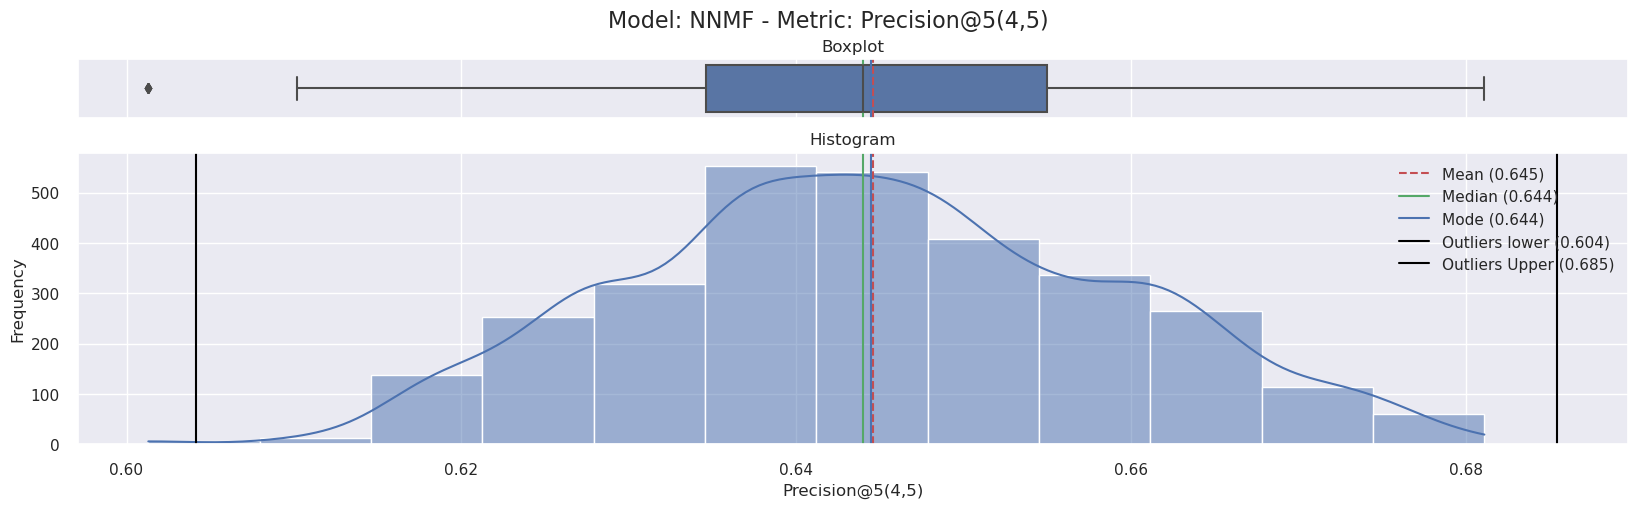

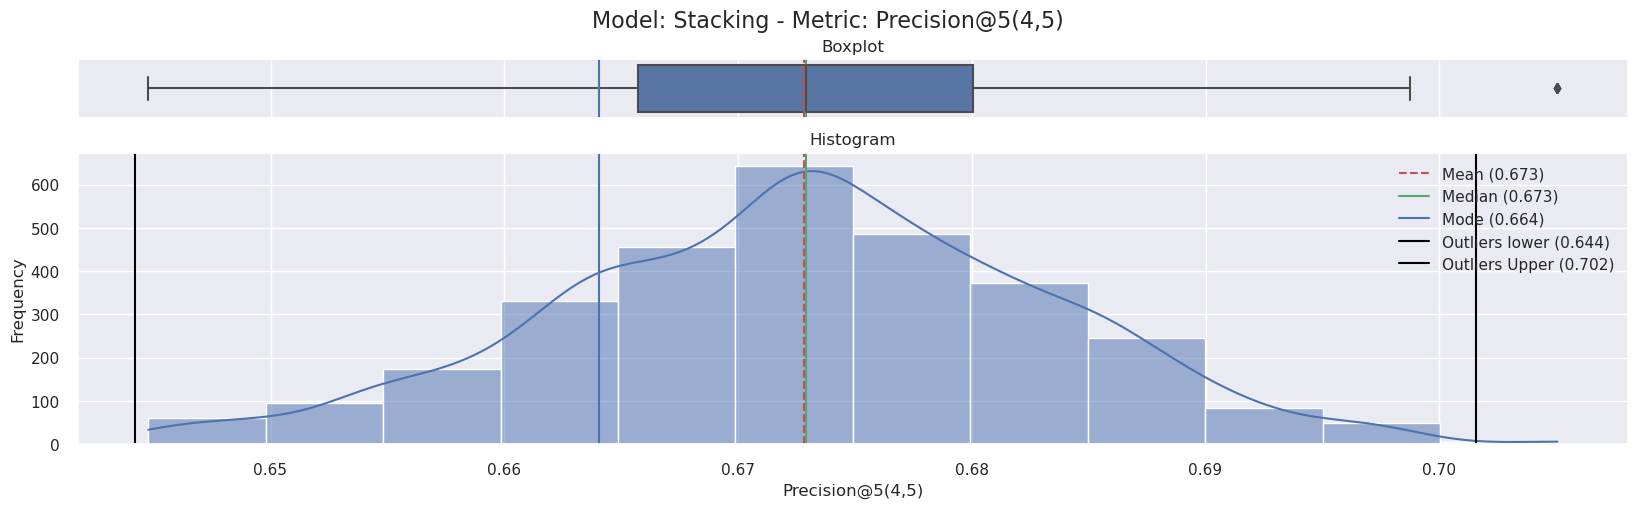

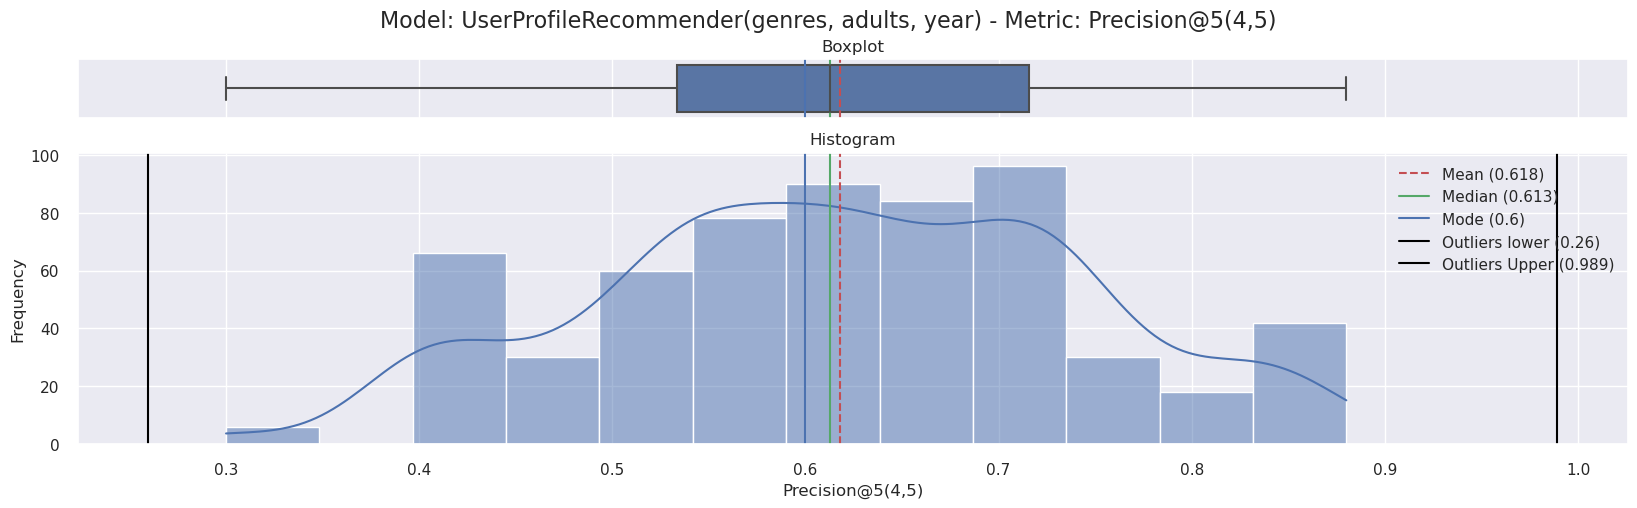

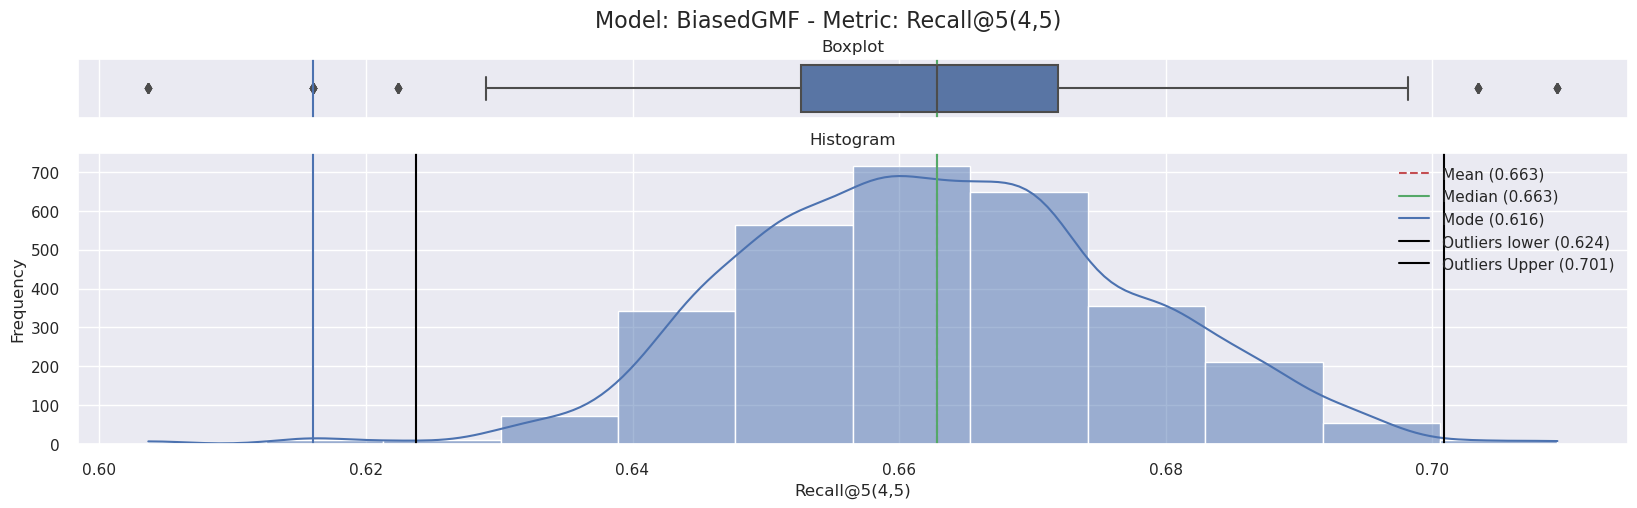

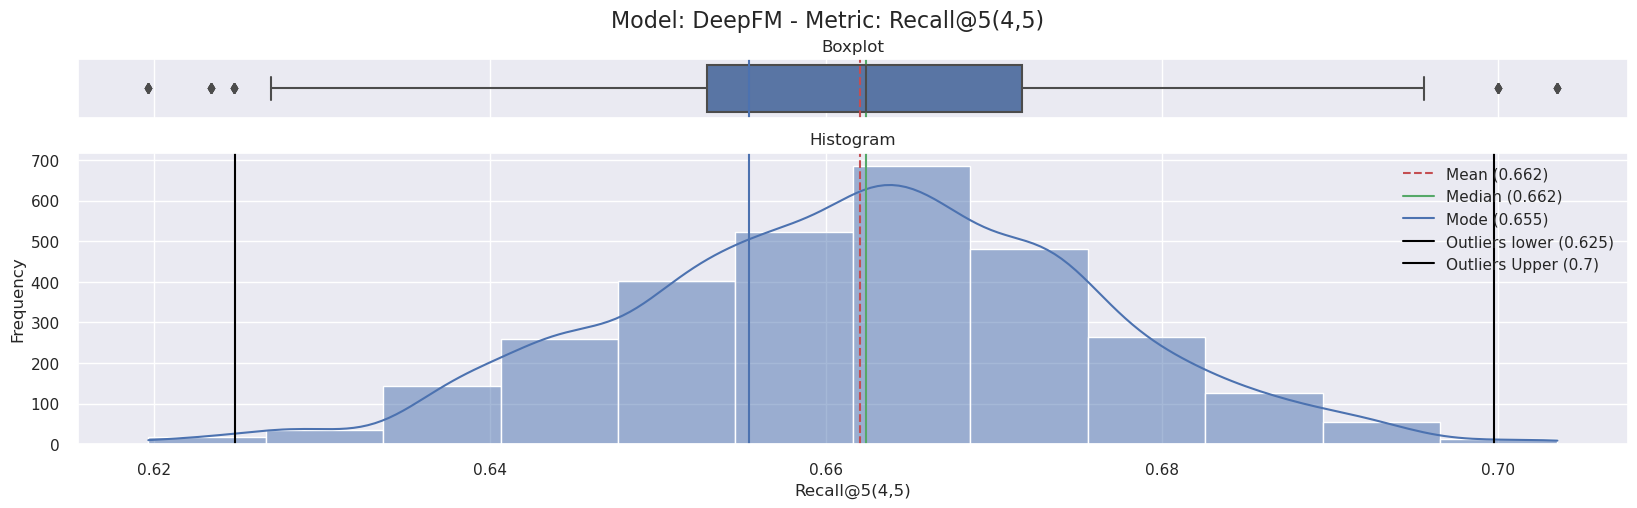

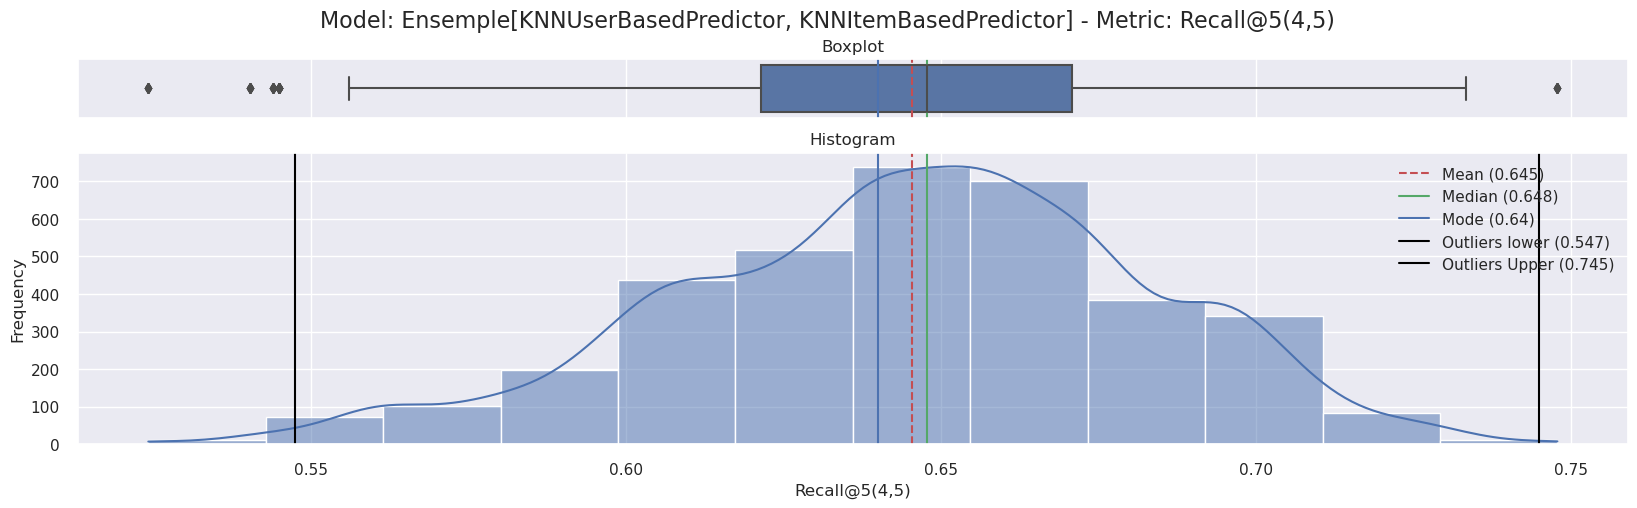

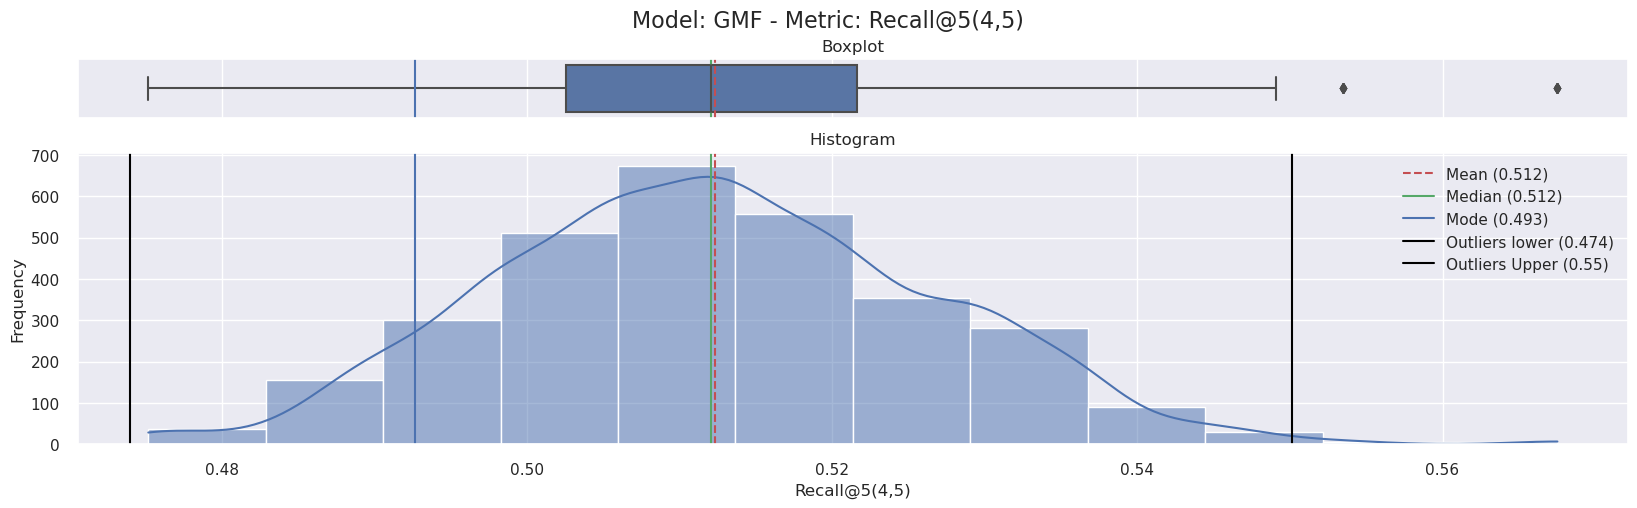

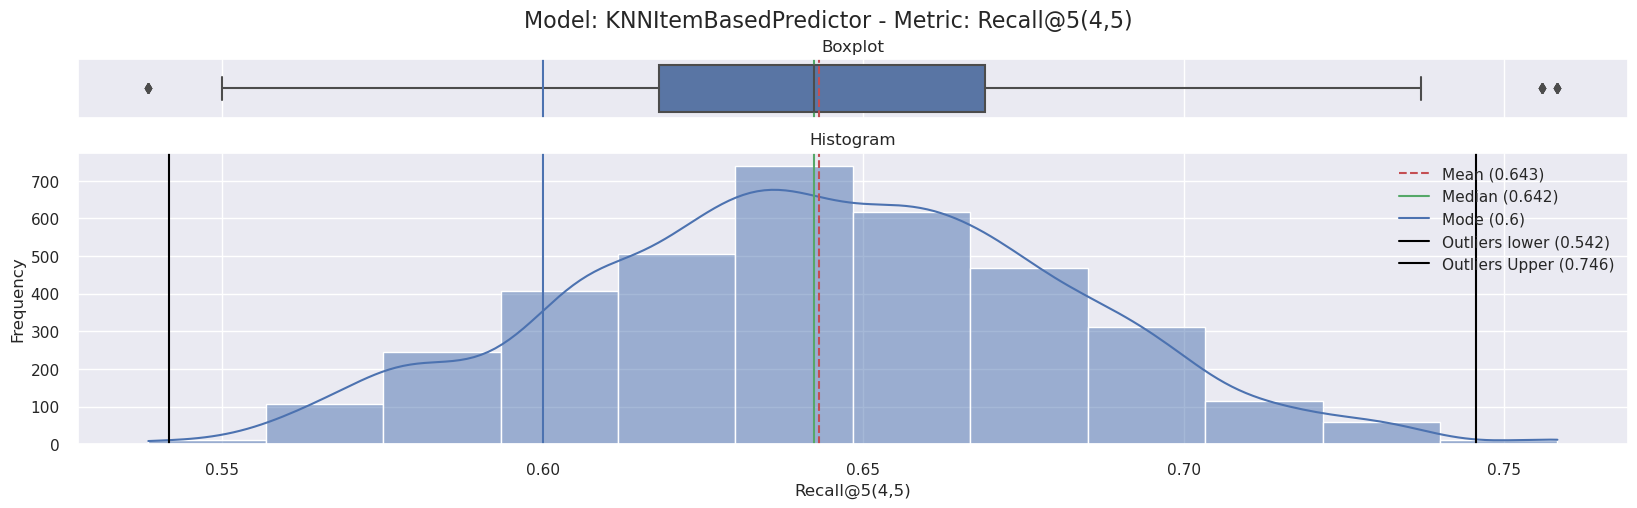

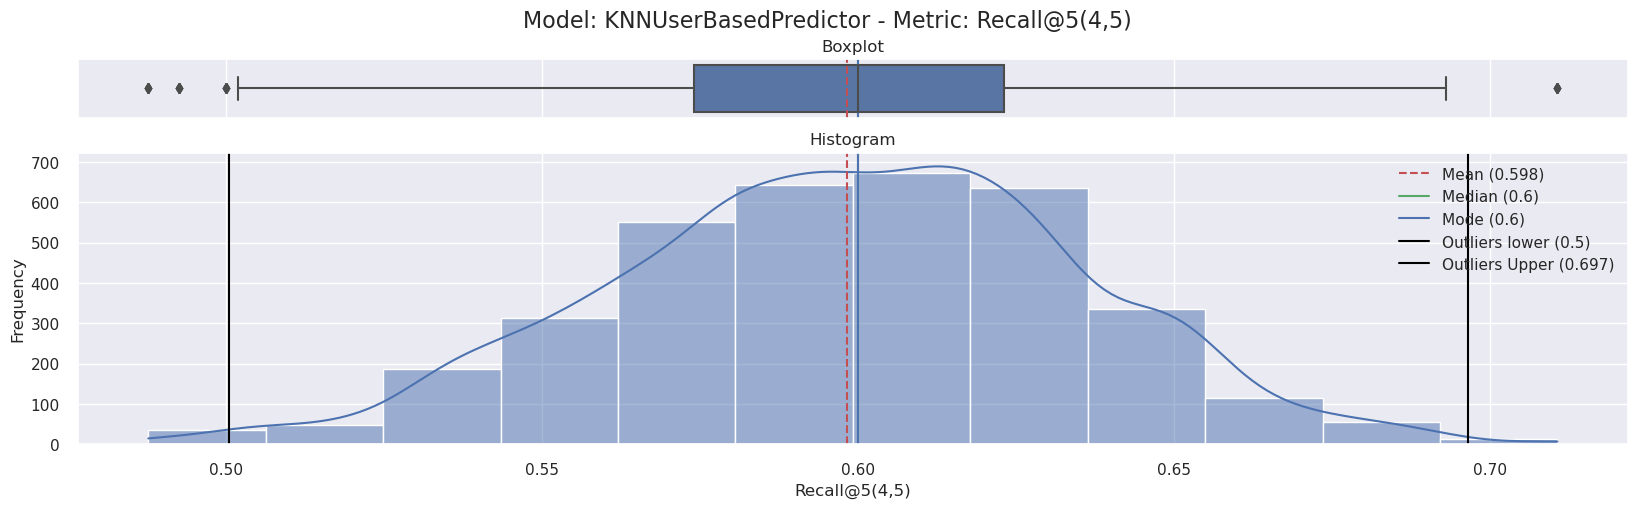

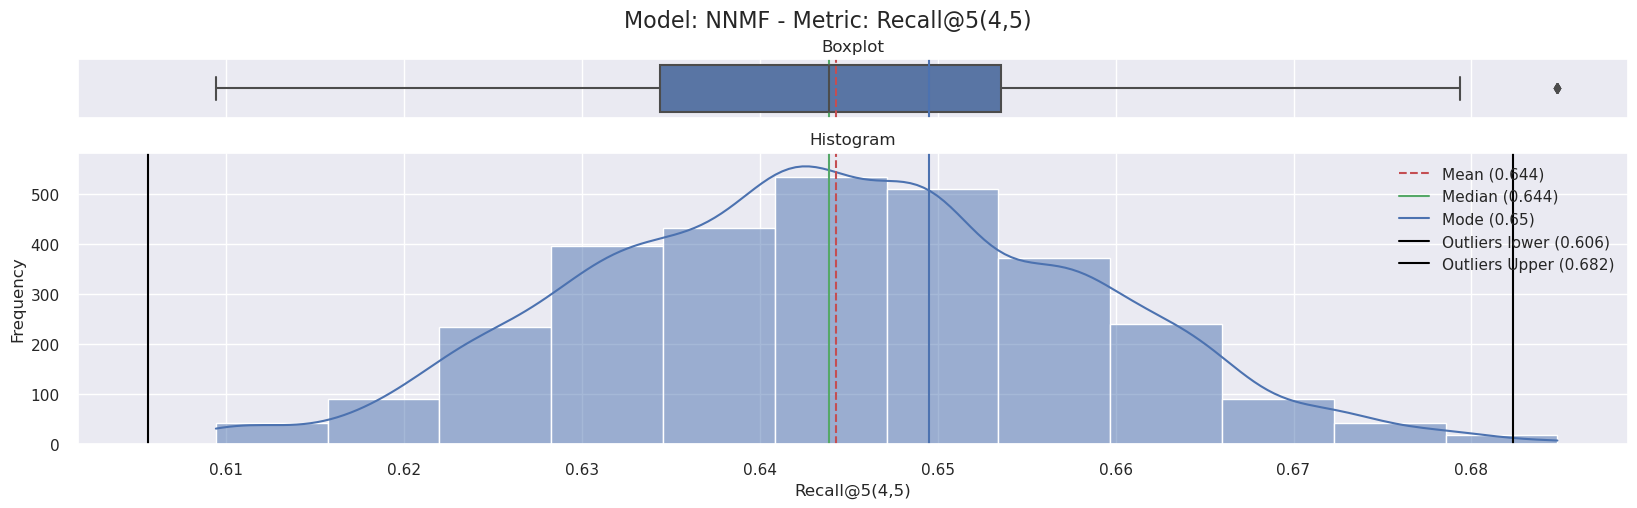

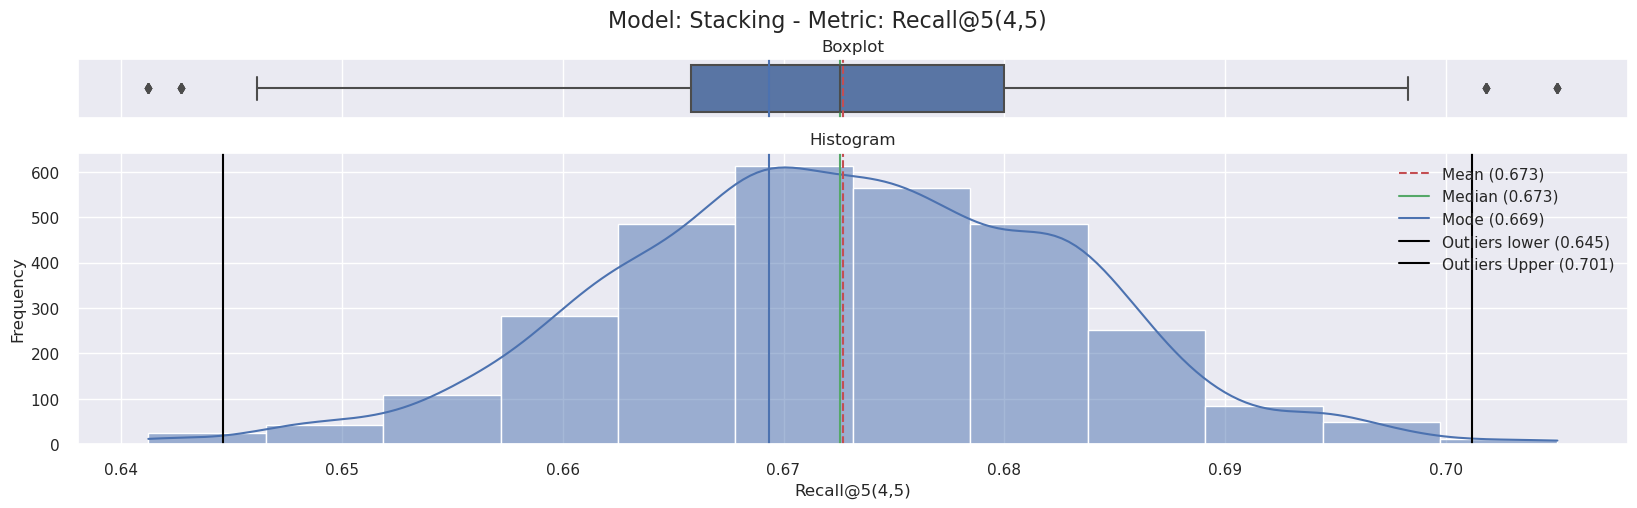

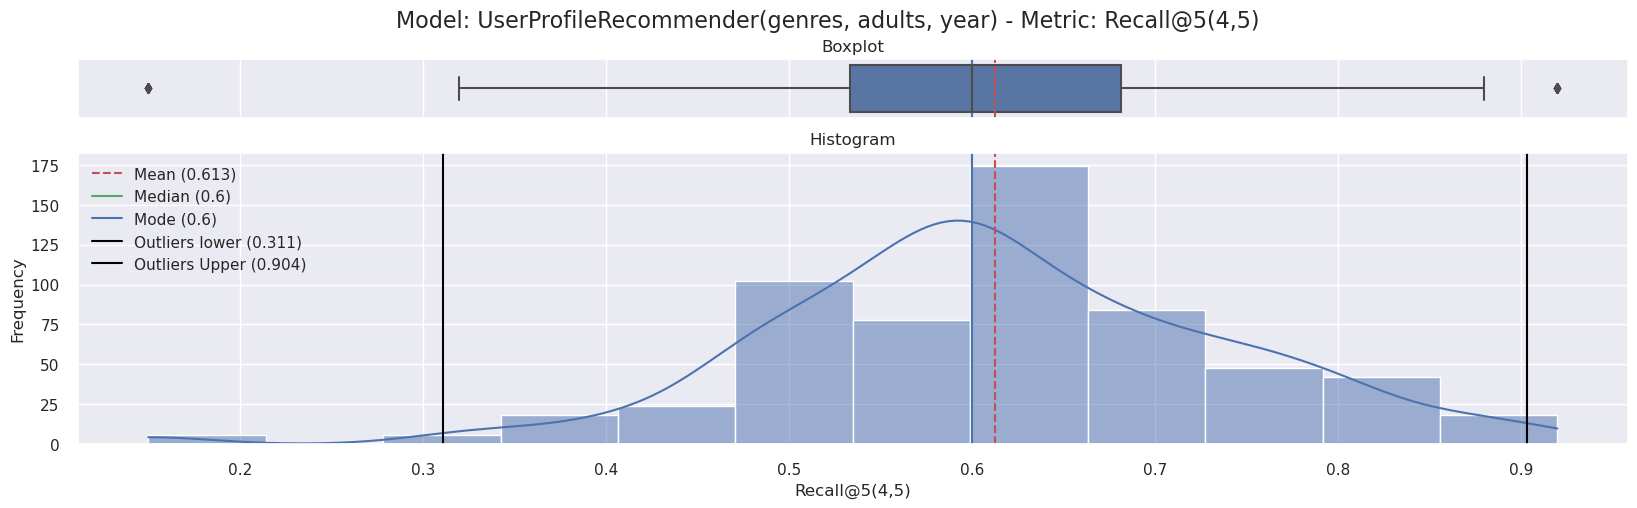

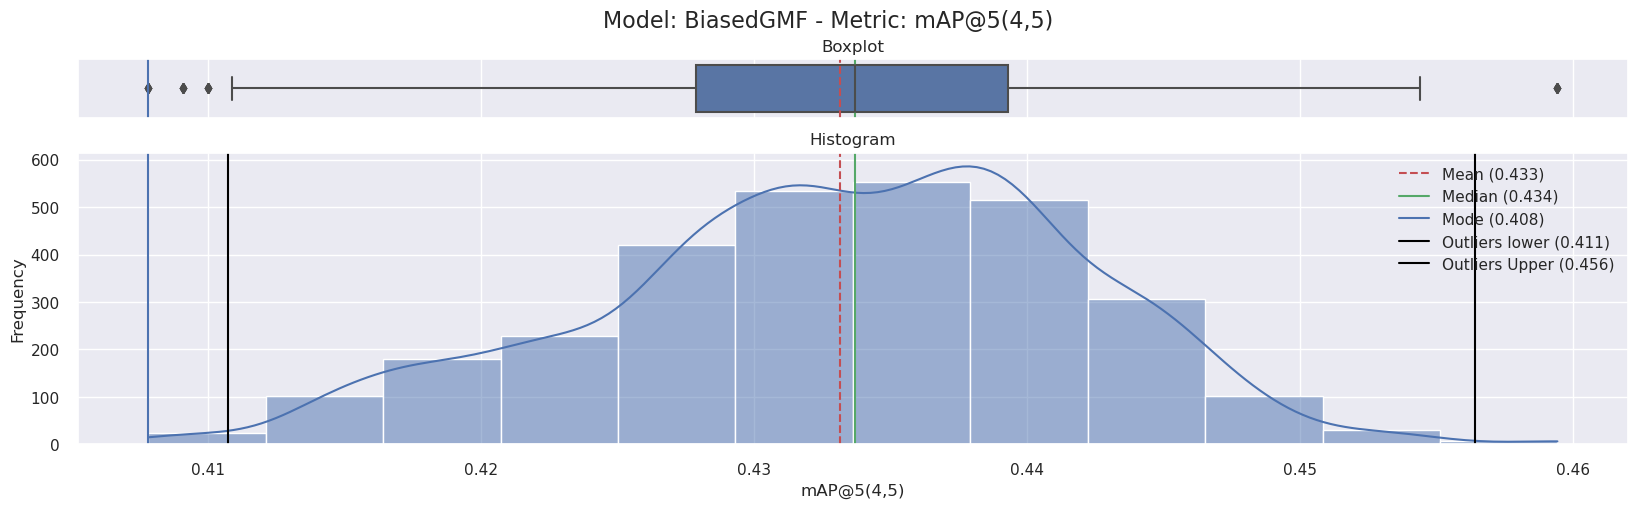

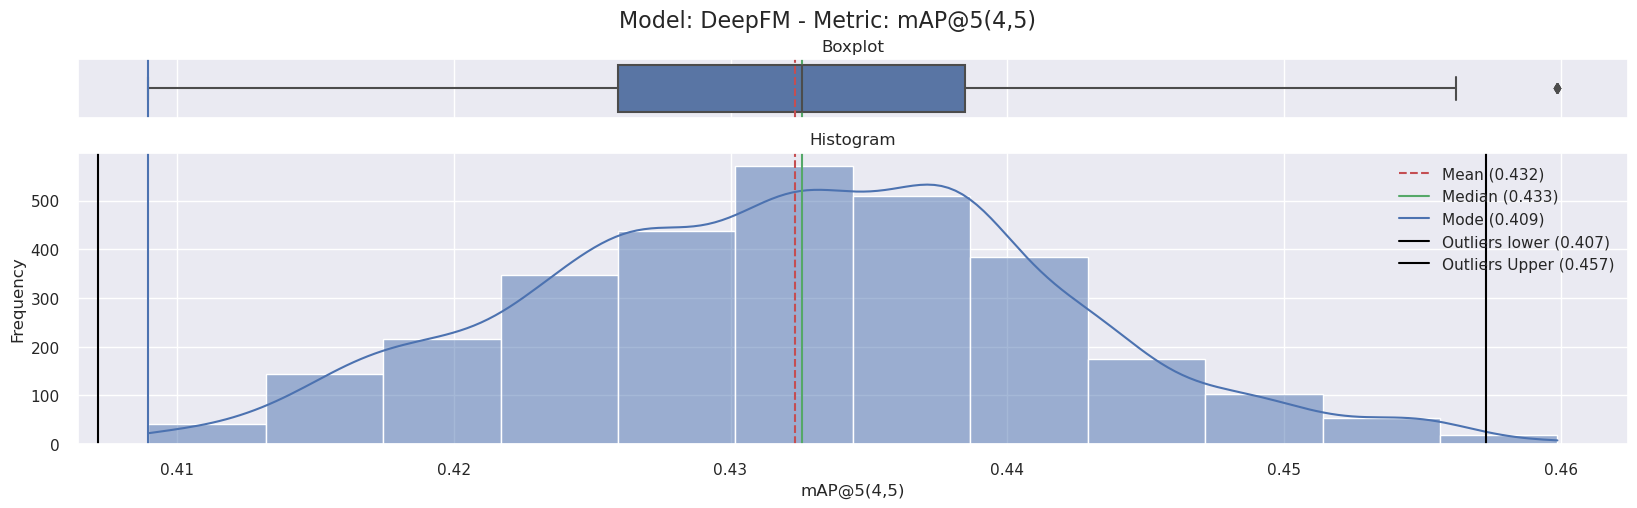

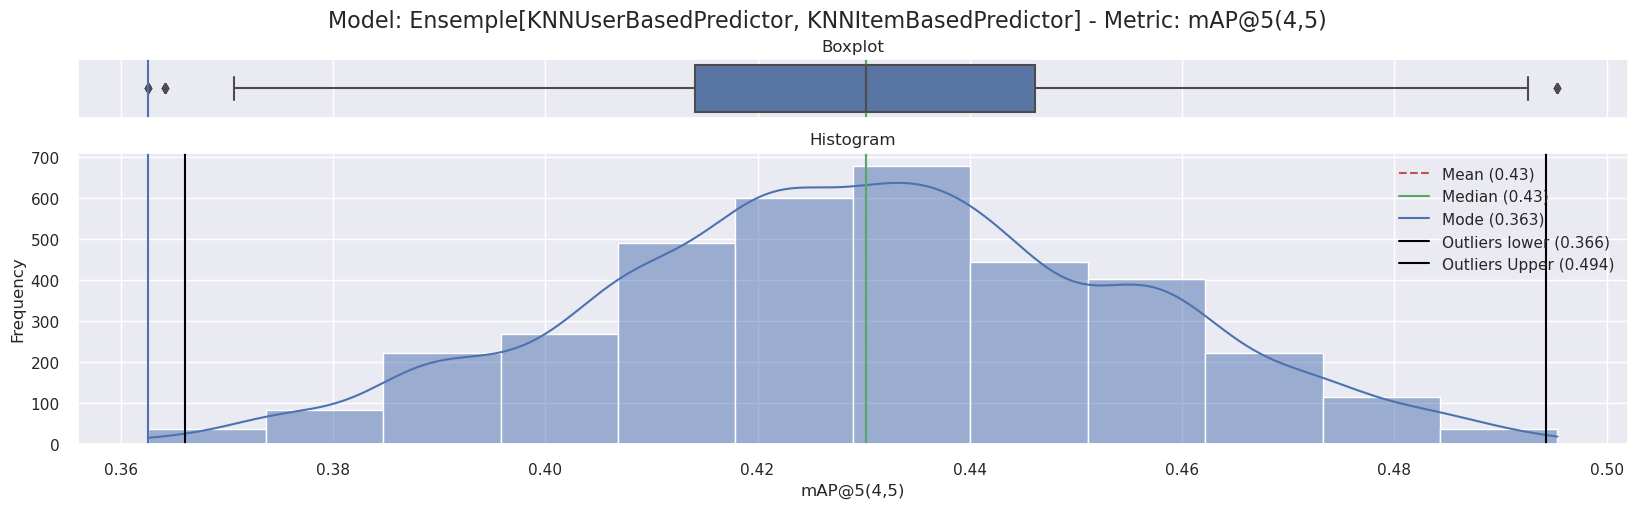

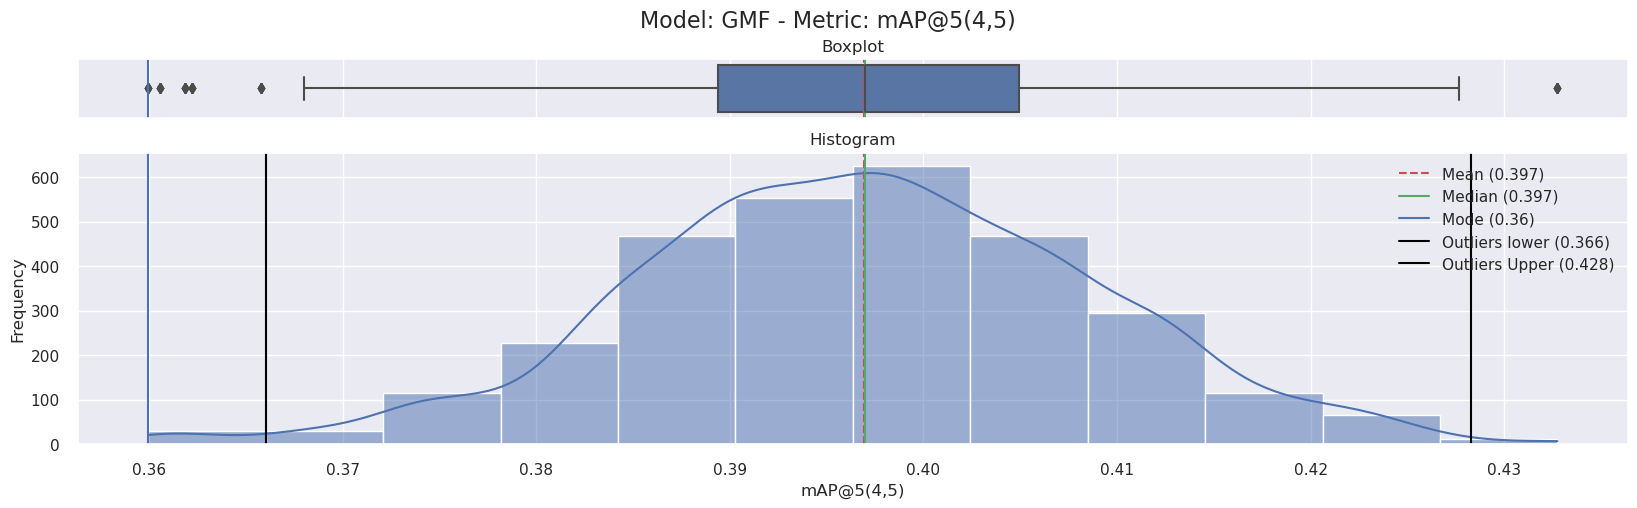

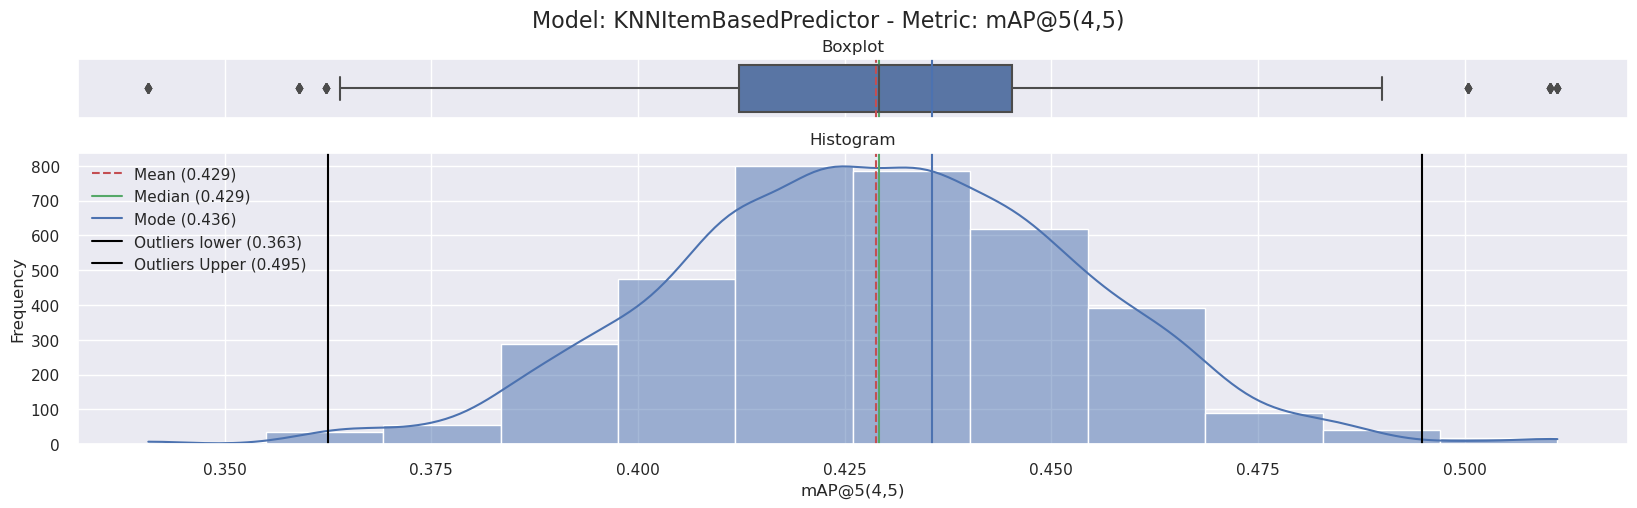

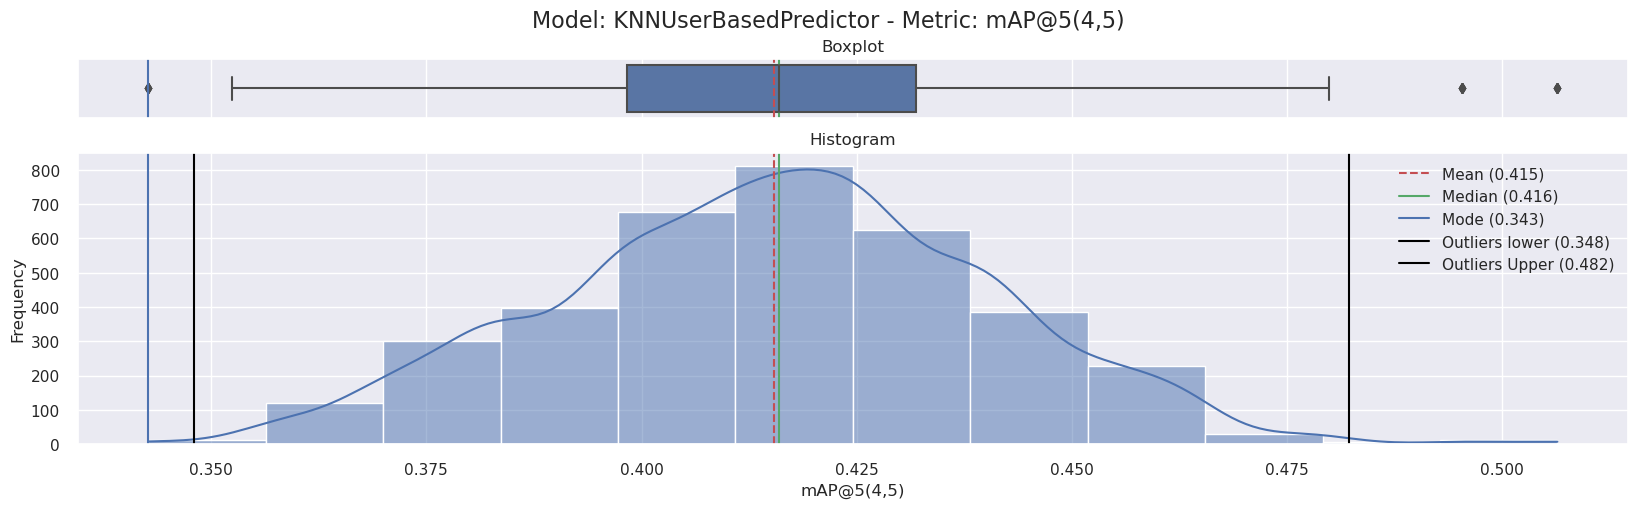

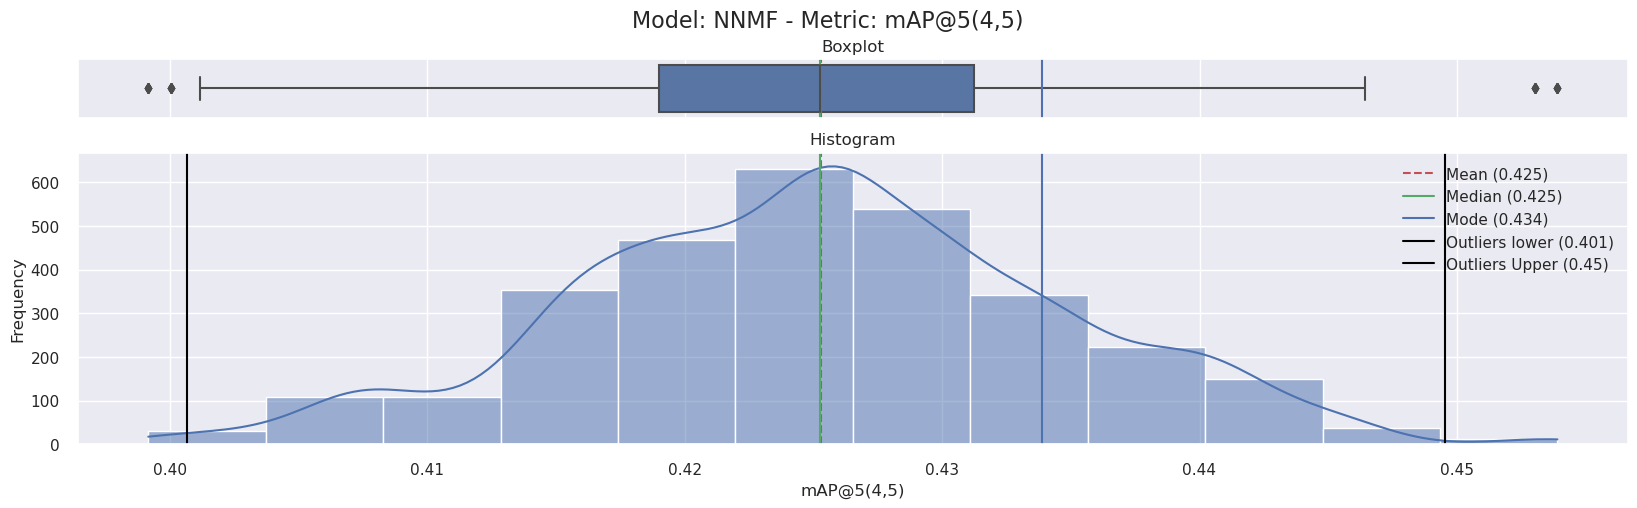

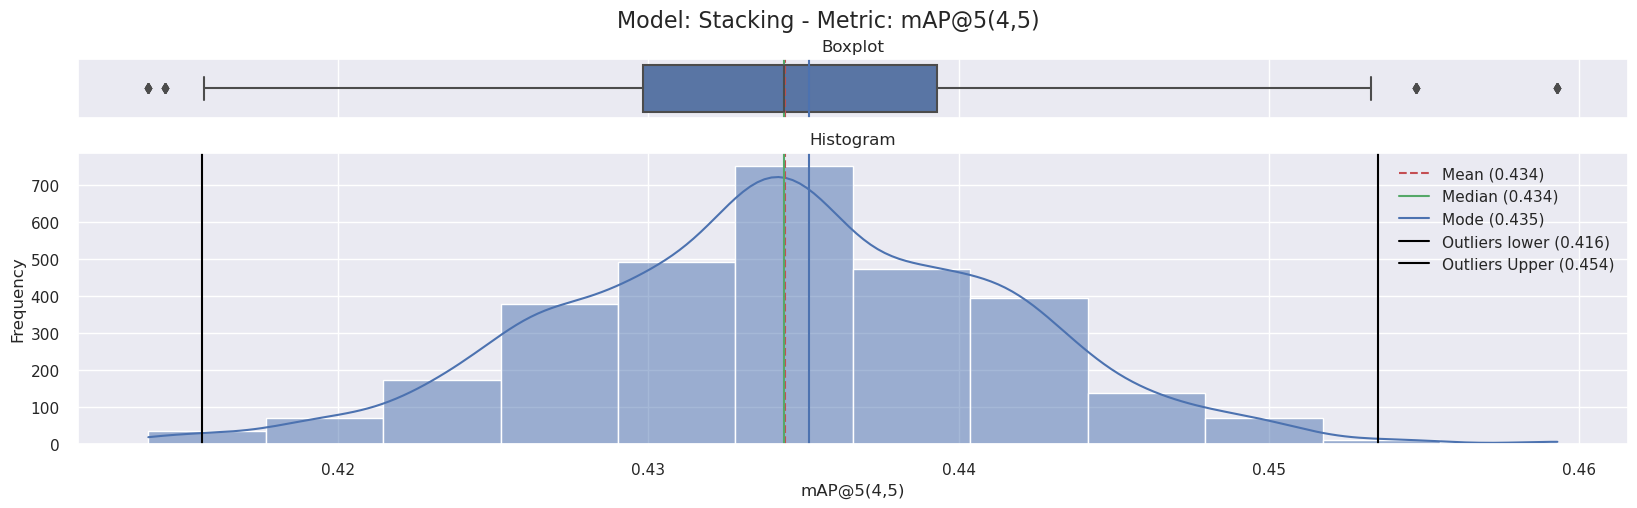

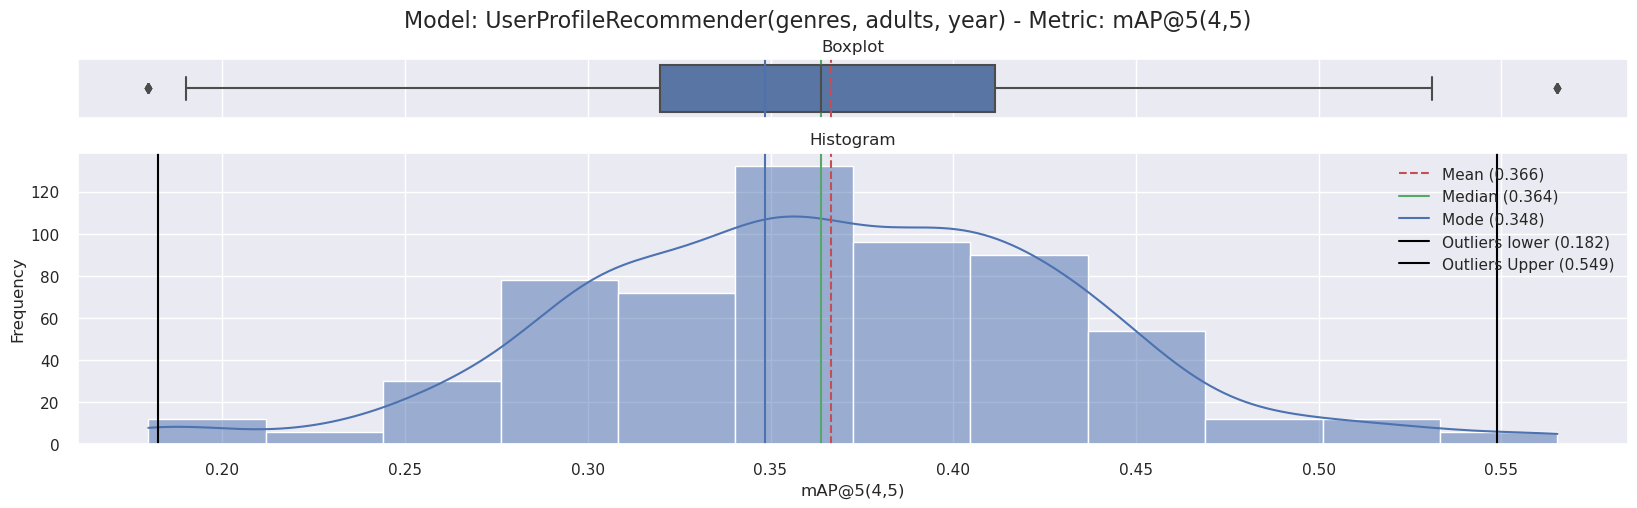

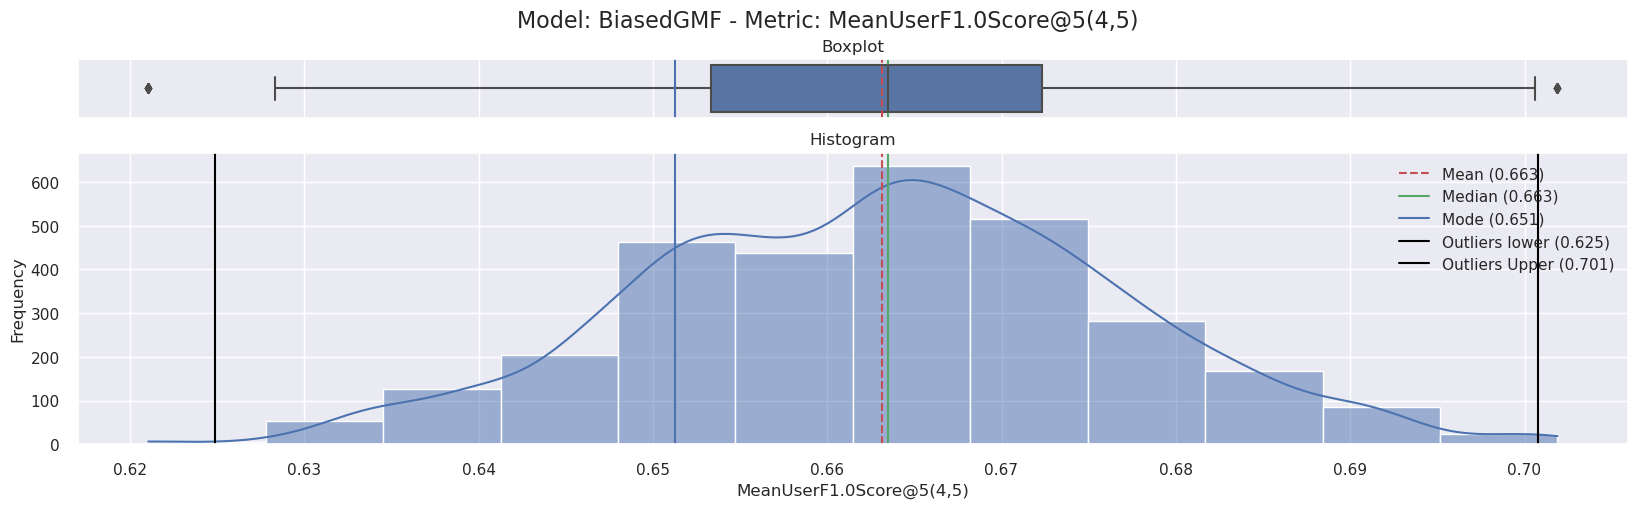

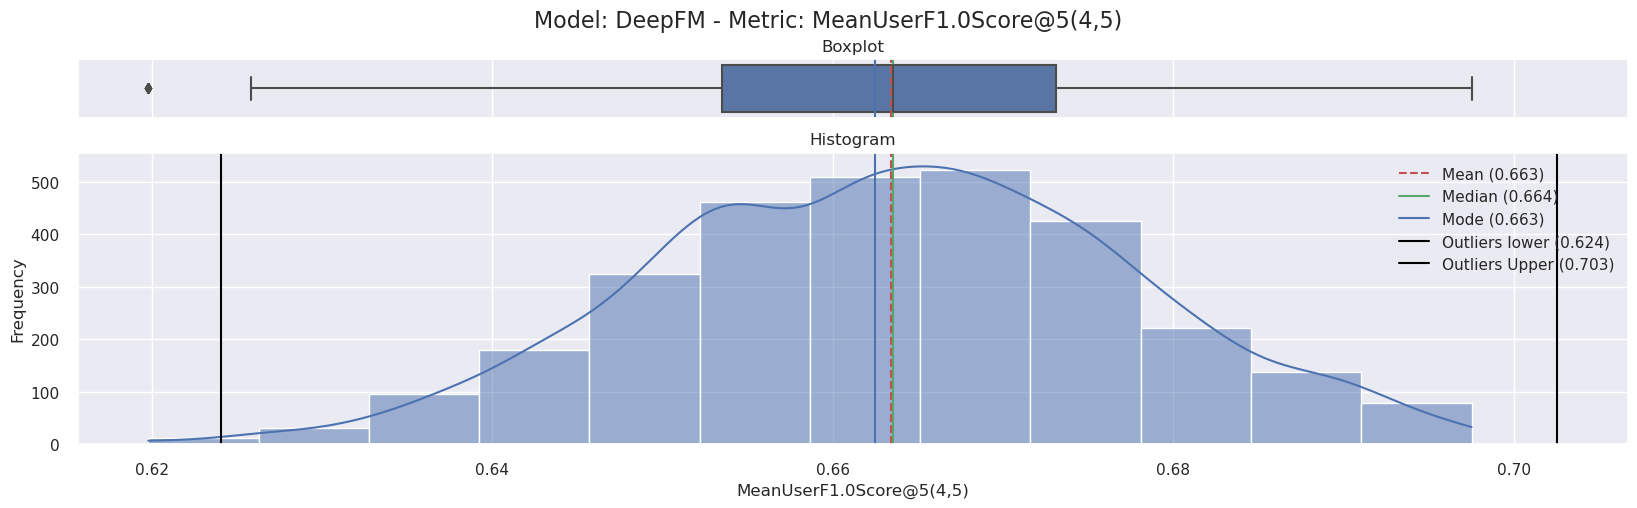

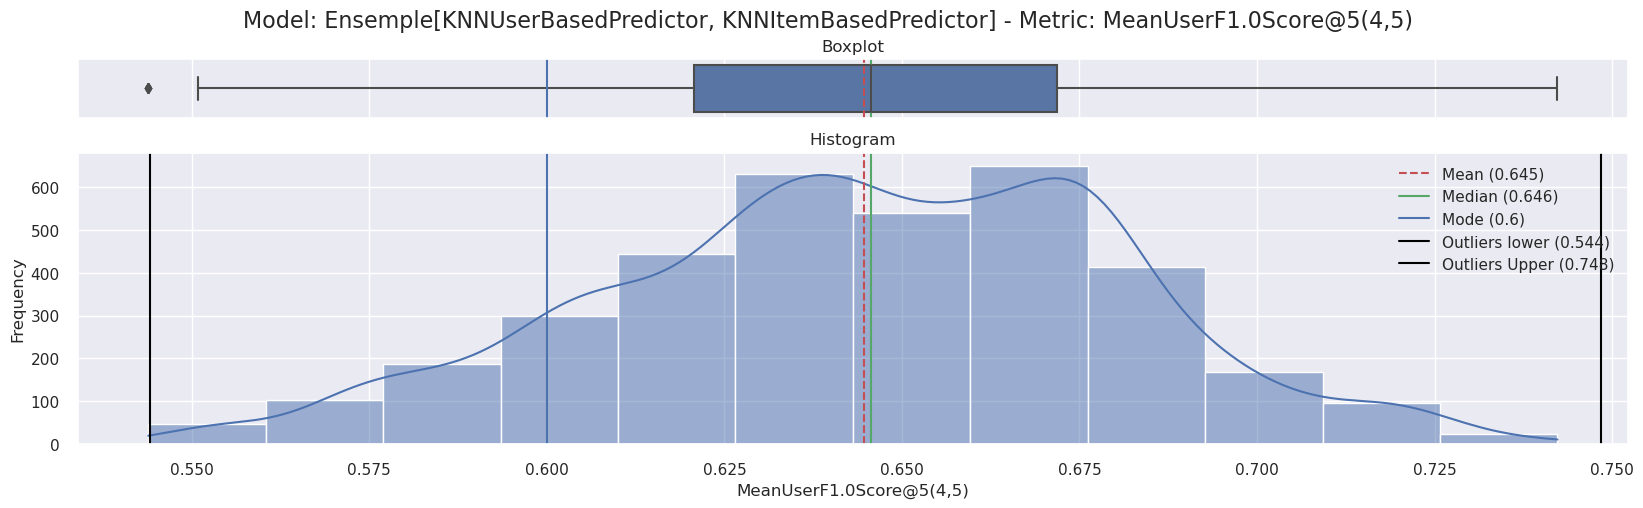

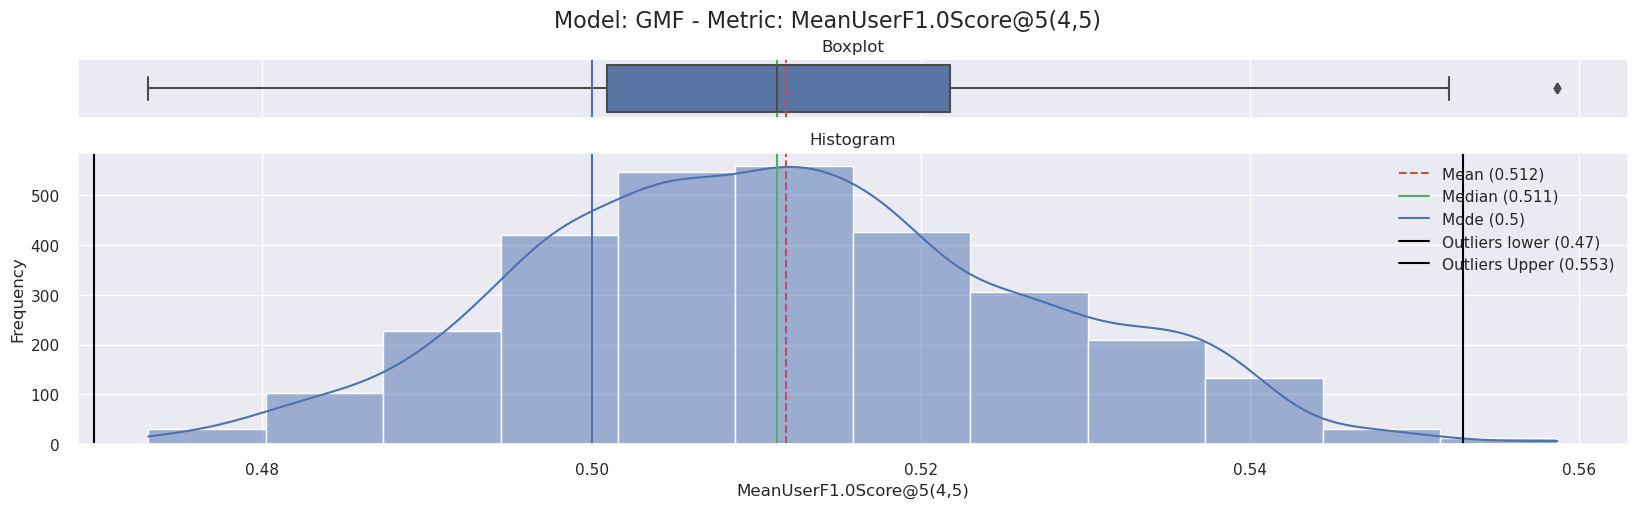

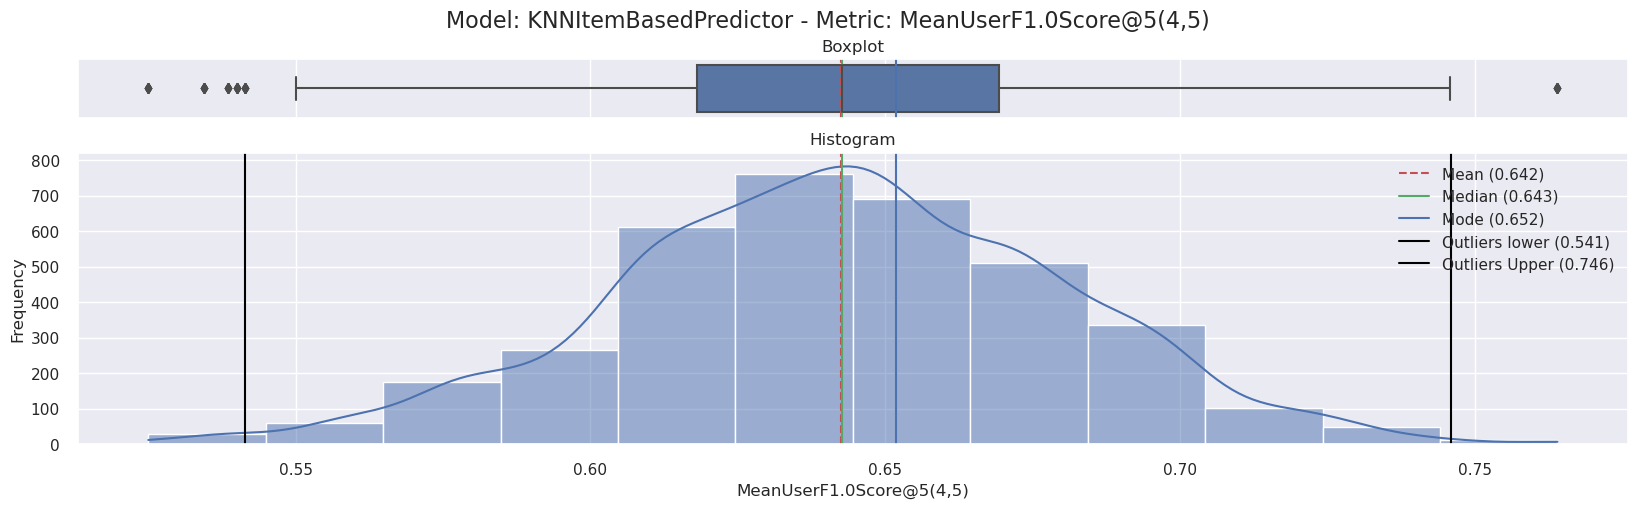

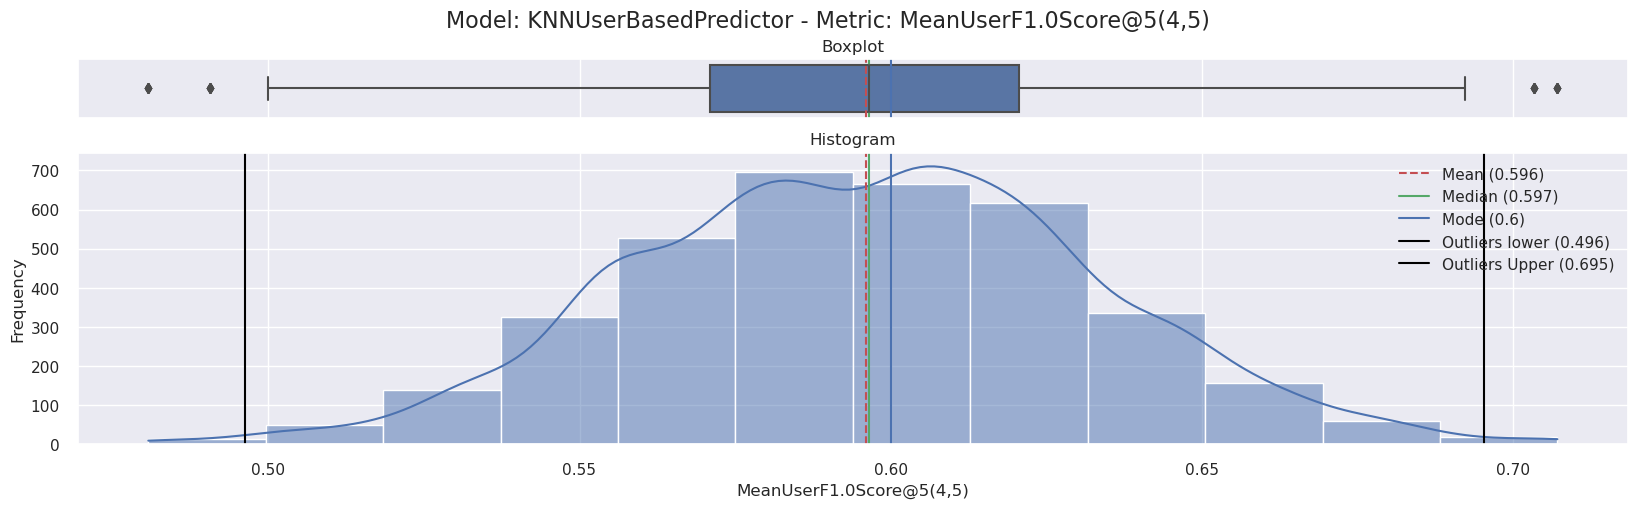

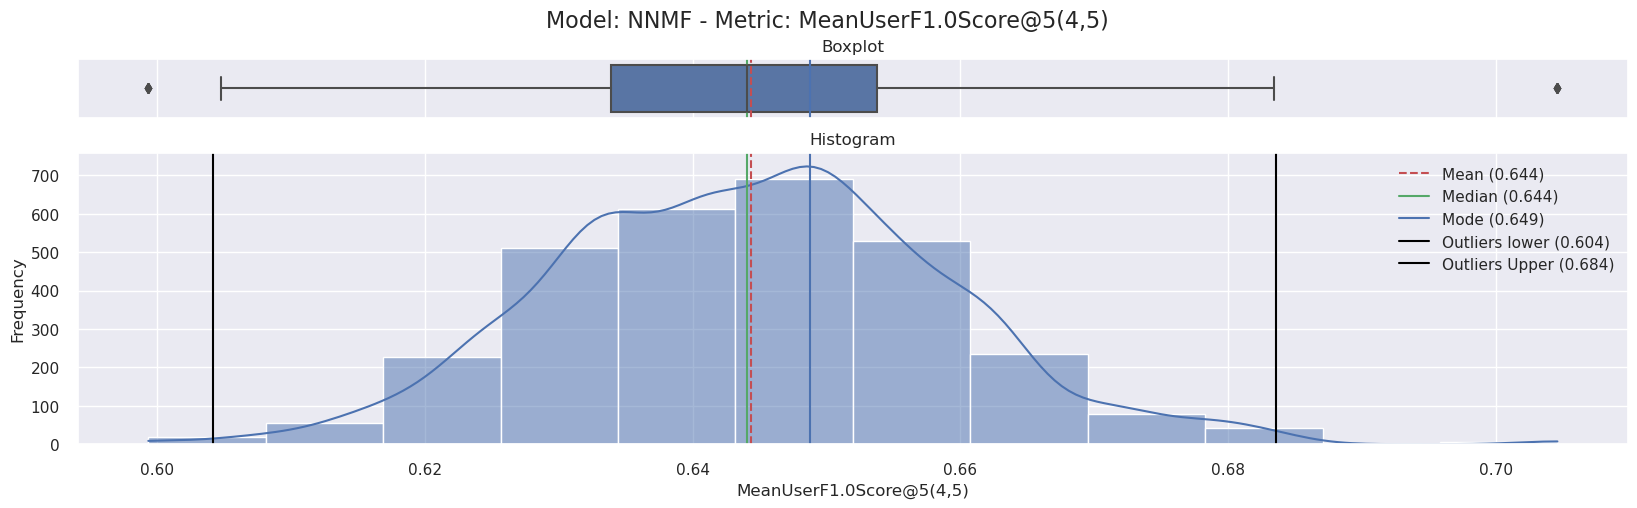

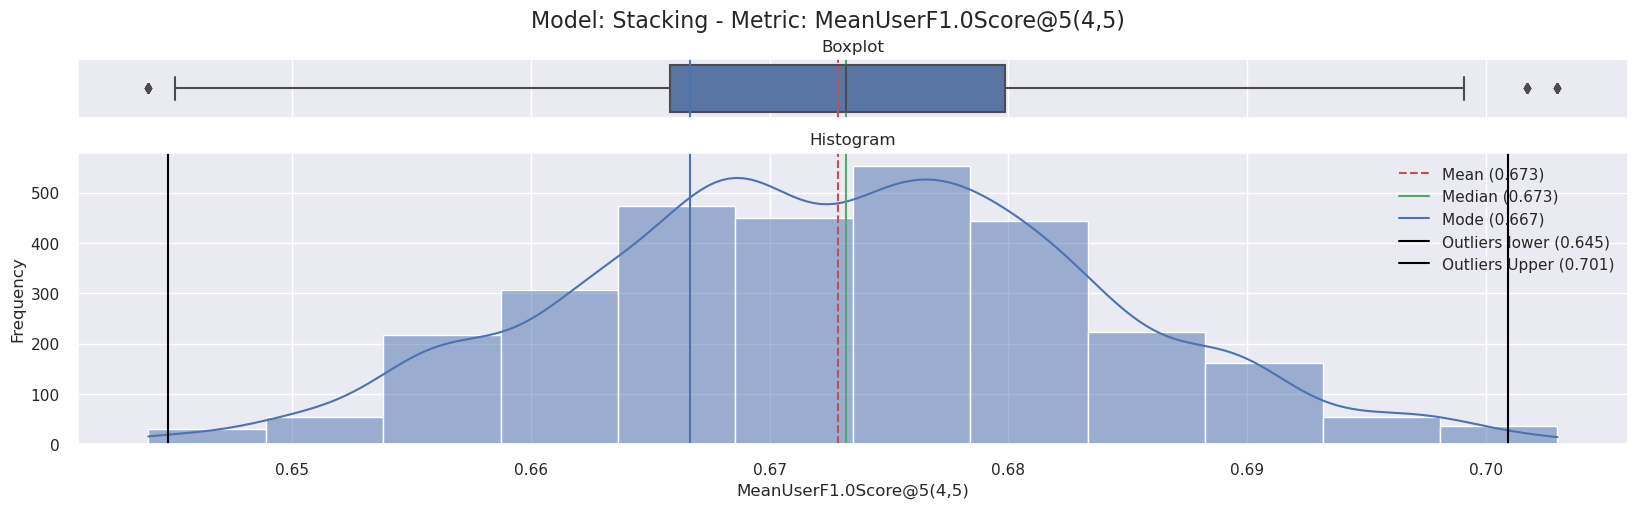

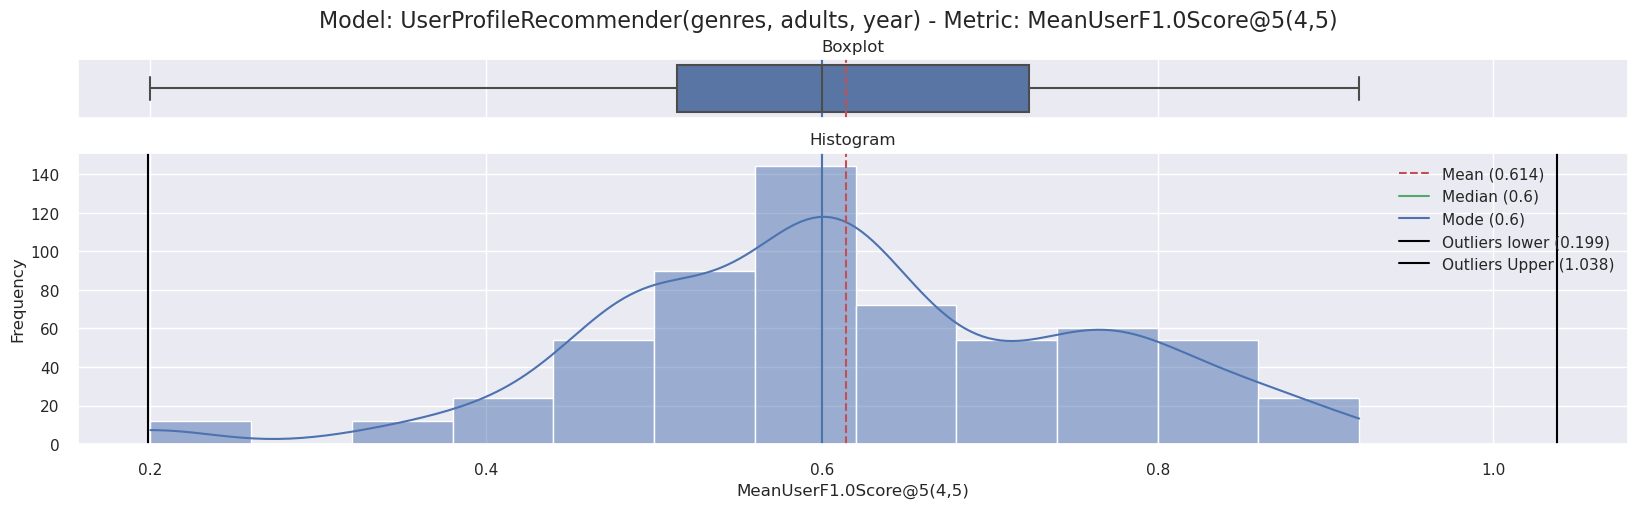

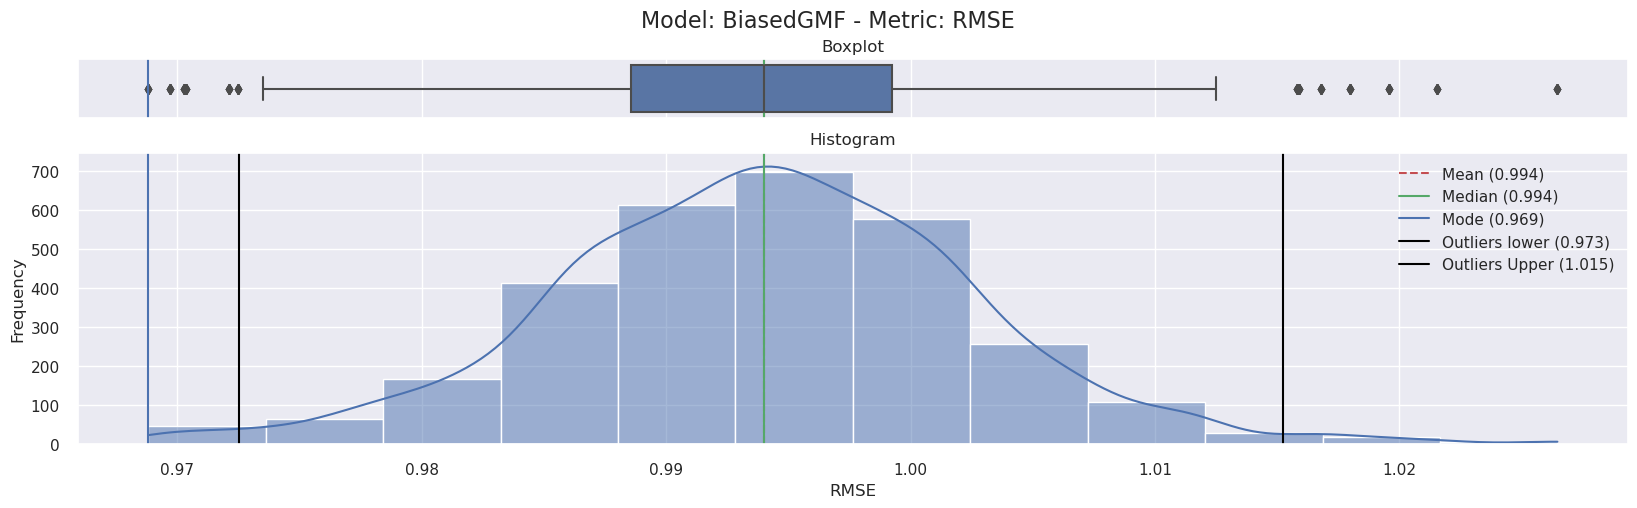

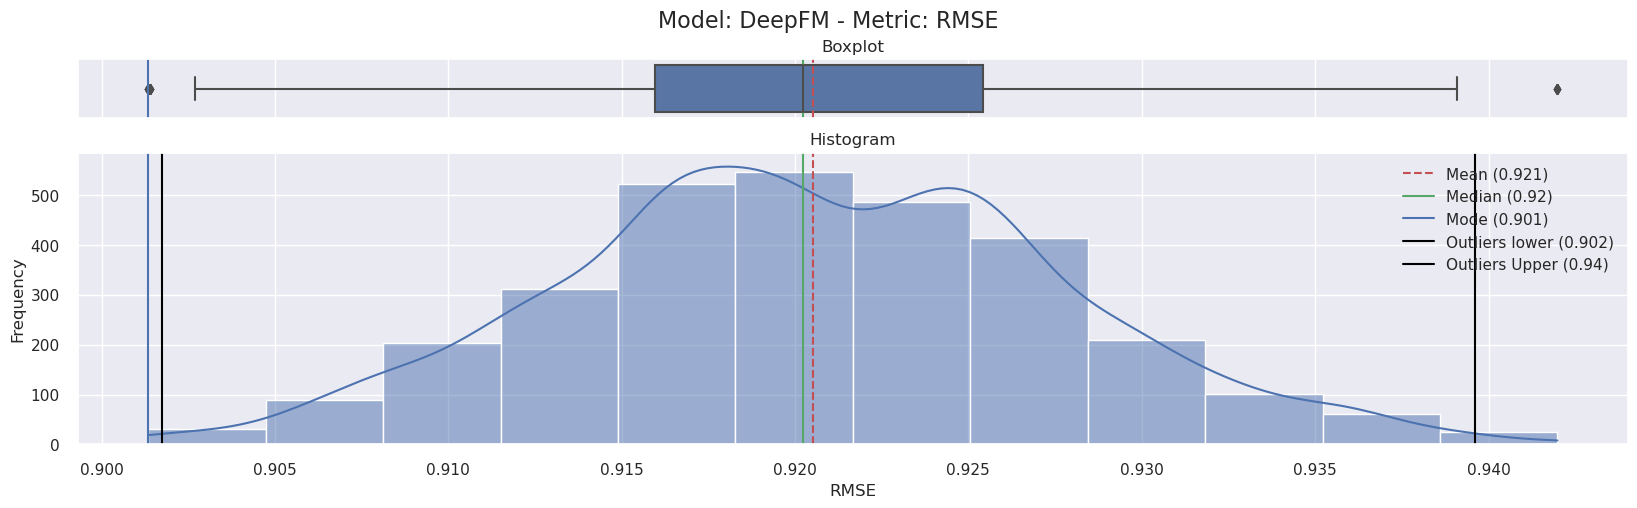

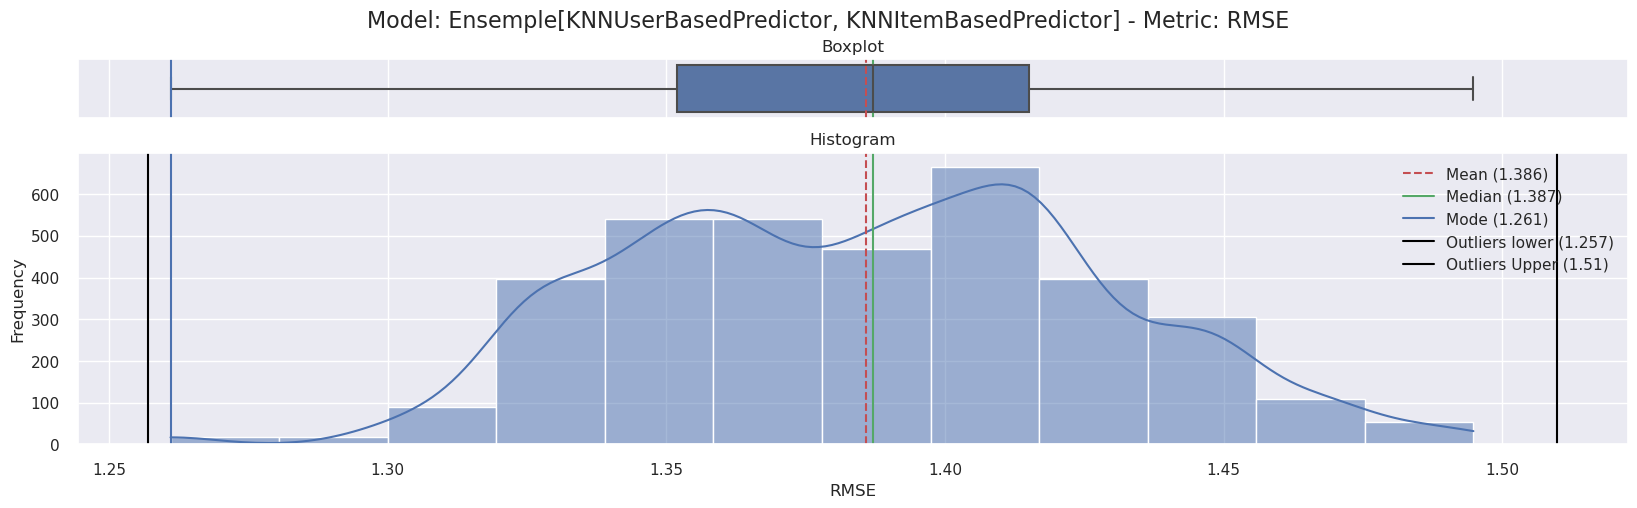

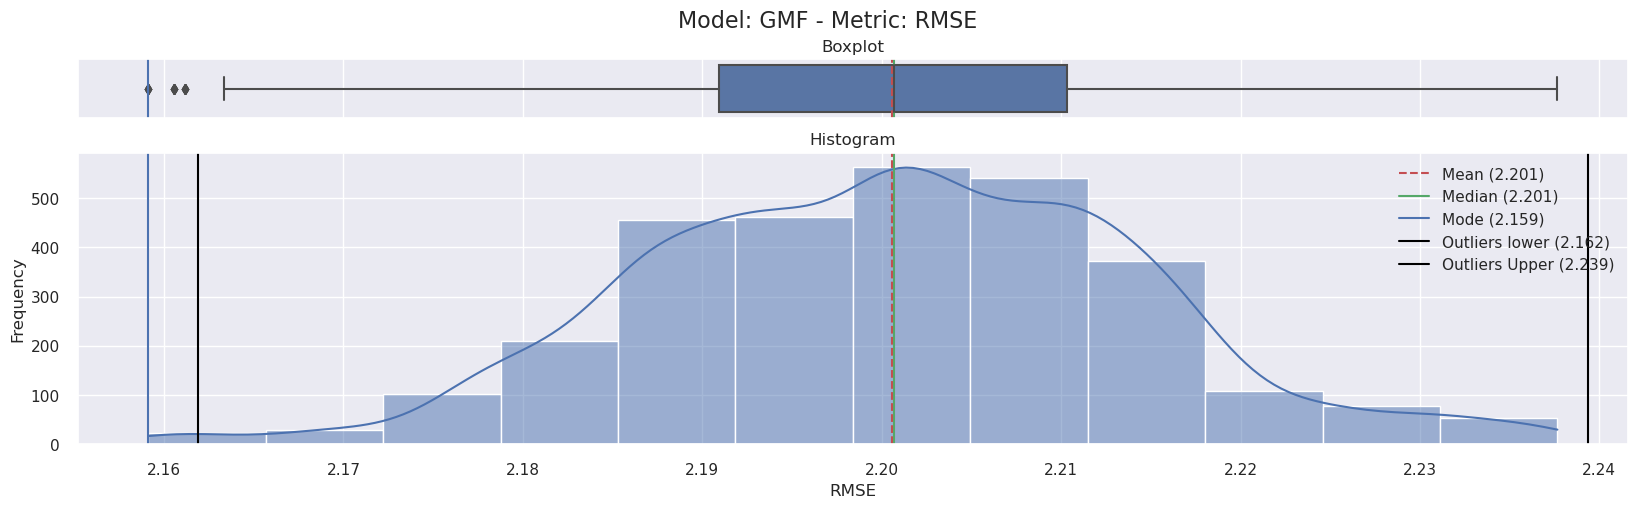

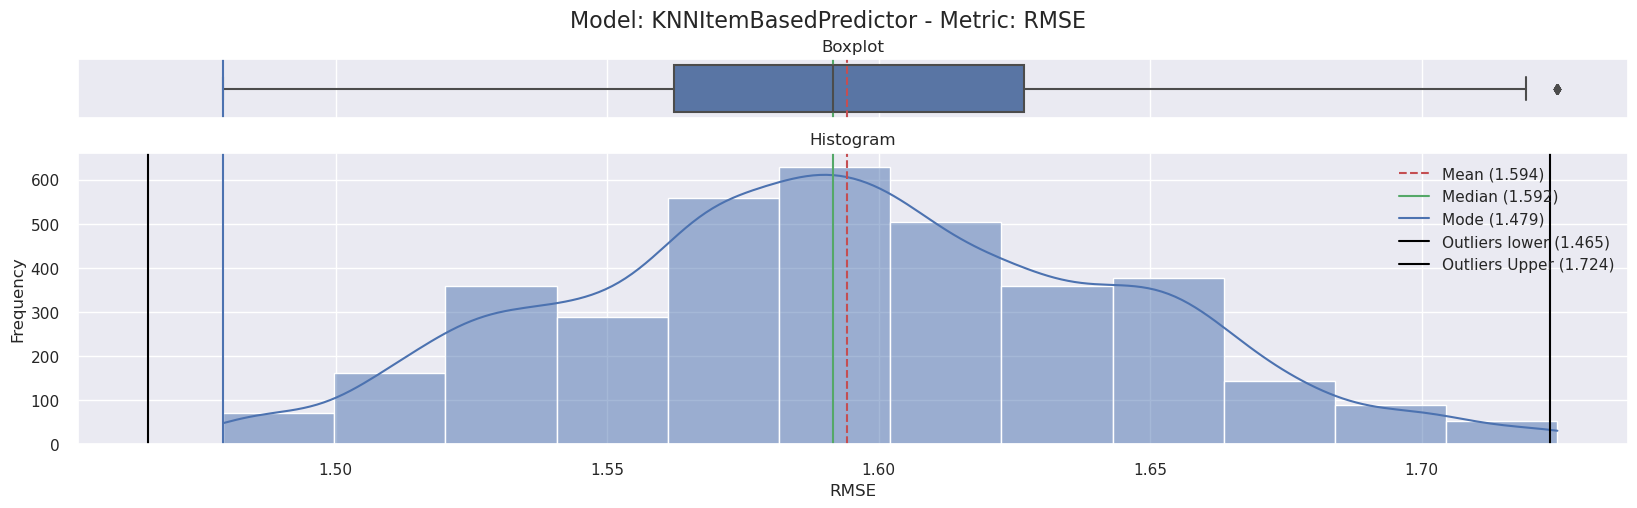

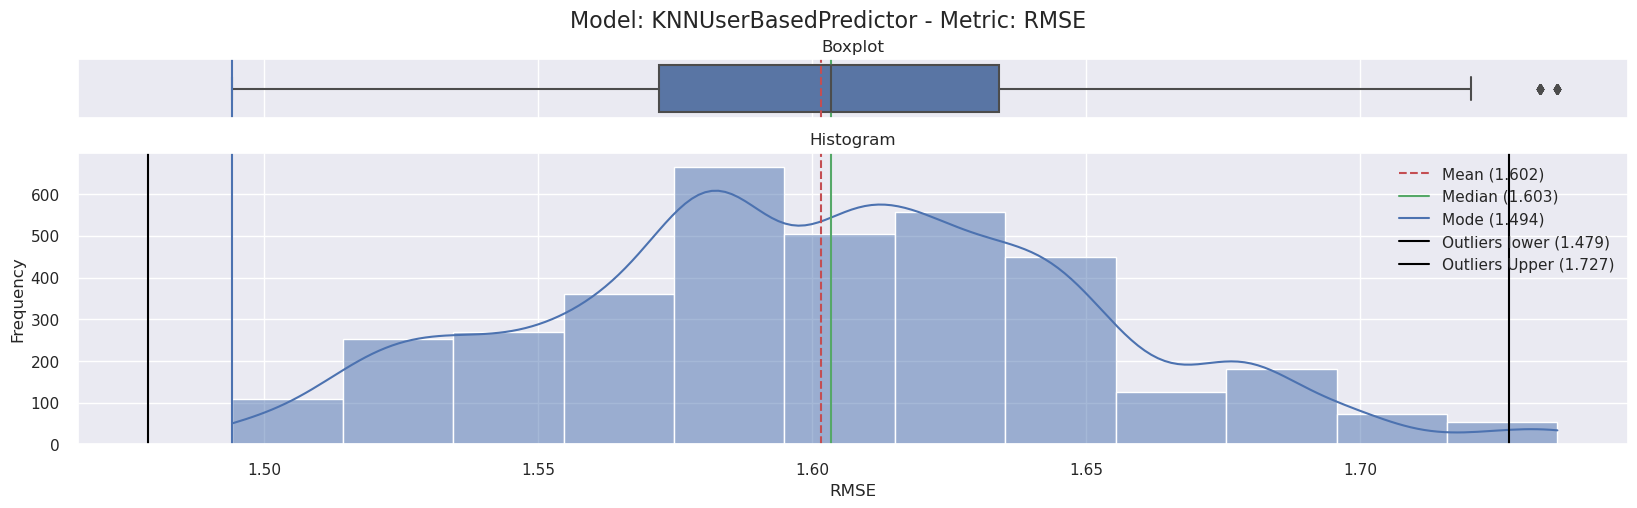

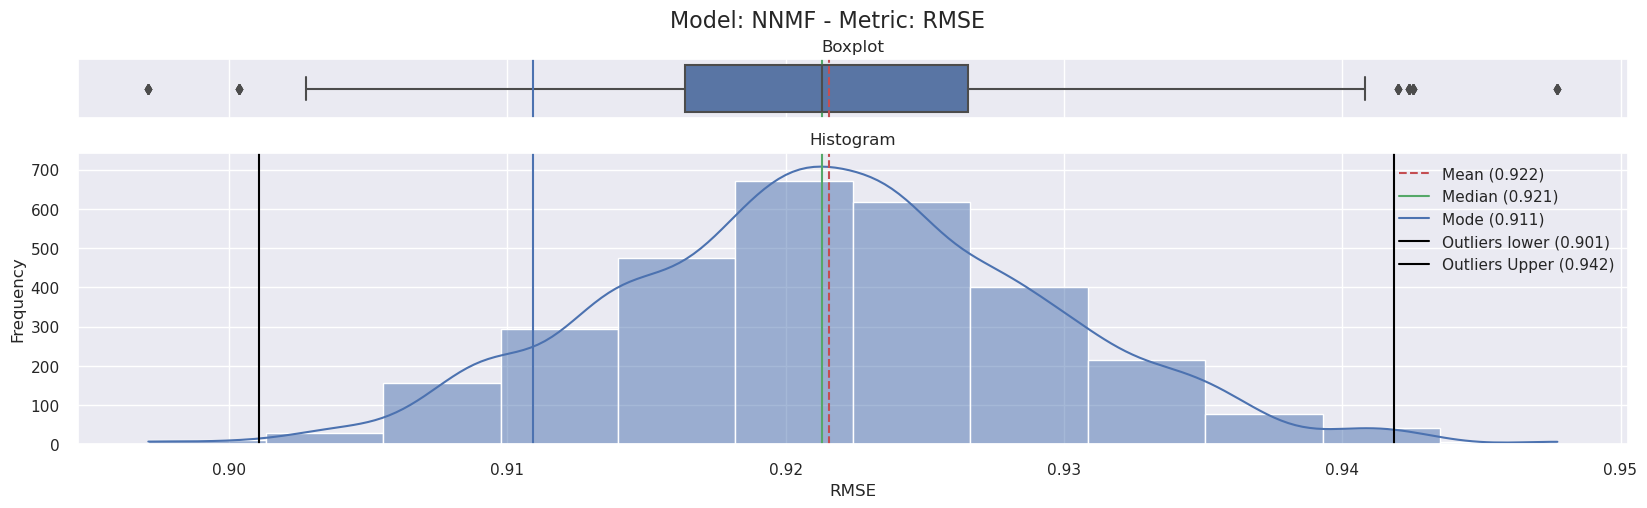

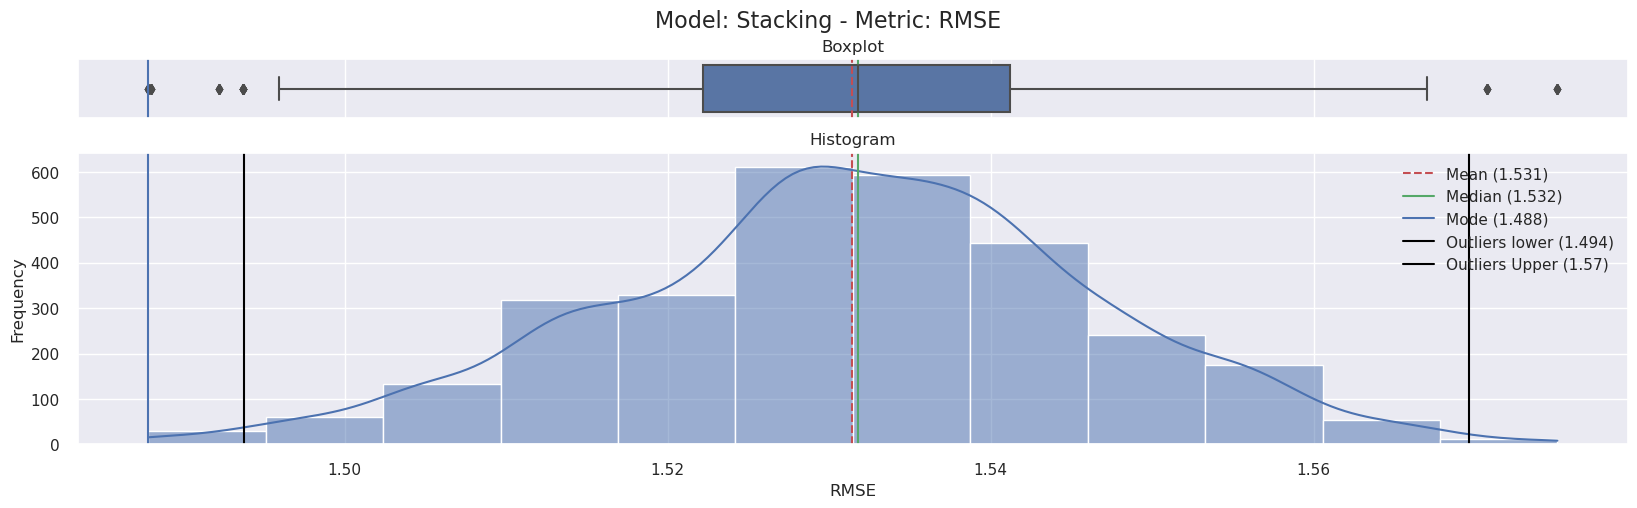

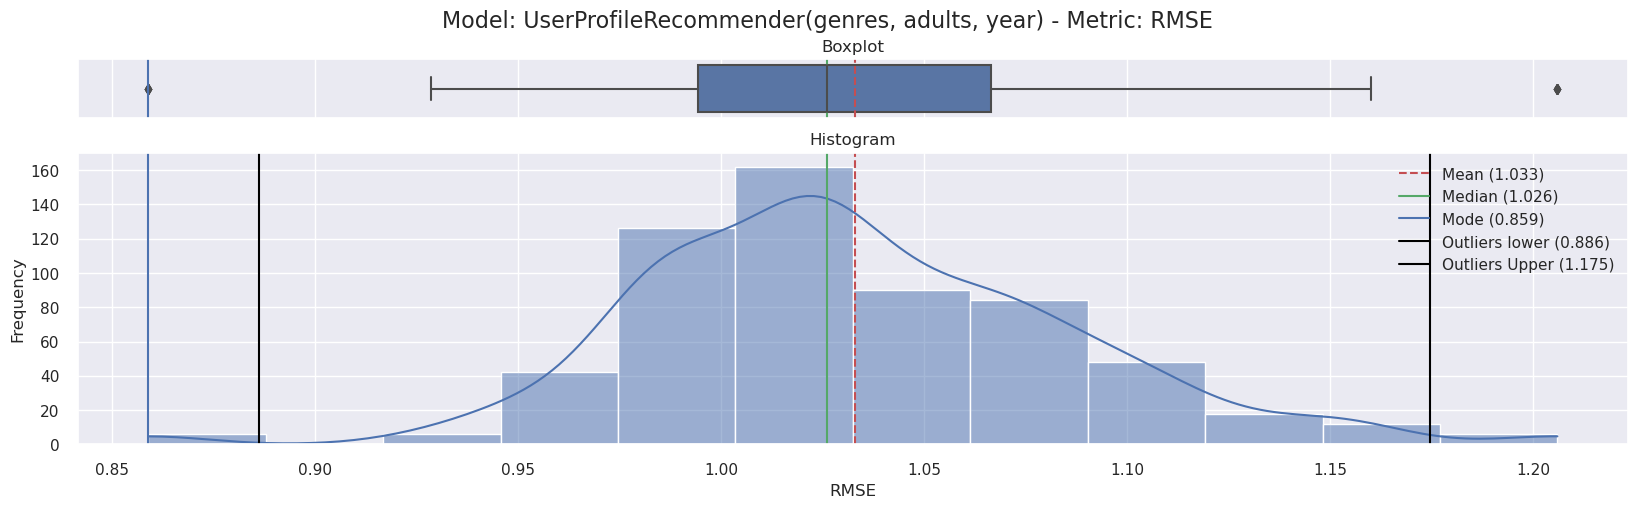

In [11]:
summary.plot(bins=12)